# 0.0 imports

In [94]:
import pandas as pd
import inflection
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1.0 load dataset

In [2]:
df_raw = pd.read_csv('../data/df_ready.csv')

In [16]:
df_raw.head()

Unnamed: 0             Date_imp  Date_imp_d  Cluster  \
0           4  2017-12-14 06:00:00  2017/12/14       35   
1           5  2017-09-08 05:00:00  2017/09/08       35   
2           6  2017-10-24 04:00:00  2017/10/24       35   
3           7  2017-08-15 15:00:00  2017/08/15       35   
4           8  2017-09-14 21:00:00  2017/09/14       35   

                  Category_name  \
0  speaker, portable, bluetooth   
1  speaker, portable, bluetooth   
2  speaker, portable, bluetooth   
3  speaker, portable, bluetooth   
4  speaker, portable, bluetooth   

                                                name  price  disc_price  \
0  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       64.99   
1  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.00       69.00   
2  Boytone - 2500W 2.1-Ch. Home Theater System - ...  66.00       66.00   
3  Boytone - 2500W 2.1-Ch. Home Theater System - ...  74.99       74.99   
4  Boytone - 2500W 2.1-Ch. Home Theater System - ...  69.99       69.99   

      merchant condition  ...  \
0  Walmart.com       New  ...   
1  Walmart.com       New  ...   
2  Walmart.com       New  ...   
3  Walmart.com       New  ...   
4  Walmart.com       New  ...   

                                          sourceURLs     weight  Date_imp_d.1  \
0  https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...  14 pounds    2017/12/14   
1  https://www.walmart.com/ip/Boytone-BT-210F-Blu...  14 pounds    2017/09/08   
2  https://www.walmart.com/ip/Boytone-BT-210F-Blu...  14 pounds    2017/10/24   
3  https://www.walmart.com/ip/Boytone-BT-210F-Blu...  14 pounds    2017/08/15   
4  https://www.walmart.com/ip/Boytone-BT-210F-Blu...  14 pounds    2017/09/14   

      Day_n month    month_n day Week_Number  Zscore_1 price_std  
0  Thursday    12   December  14          50  0.001525  3.880725  
1    Friday     9  September   8          36  0.001525  3.880725  
2   Tuesday    10    October  24          43 -0.760844  3.880725  
3   Tuesday     8     August  15          33  1.523722  3.880725  
4  Thursday     9  September  14          37  0.253107  3.880725  

[5 rows x 32 columns]

# 2.0 data description

In [3]:
df1 = df_raw.copy()

In [4]:
cols_selected = ['Date_imp_d', 'Category_name', 'name', 'price', 'merchant', 'brand', 'manufacturer','Day_n', 'month', 'month_n', 'day', 'Week_Number']
df1 = df1[cols_selected]

## 2.1 rename columns

In [5]:
cols_old = ['Date_imp_d', 'Category_name', 'name', 'price', 'merchant', 'brand', 'manufacturer','Day_n', 'month', 'month_n', 'day', 'Week_Number']

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

# rename
df1.columns = cols_new

In [6]:
df1.head(1)

date_imp_d                 category_name  \
0  2017/12/14  speaker, portable, bluetooth   

                                                name  price     merchant  \
0  Boytone - 2500W 2.1-Ch. Home Theater System - ...   69.0  Walmart.com   

     brand manufacturer     day_n  month   month_n  day  week_number  
0  Boytone      Boytone  Thursday     12  December   14           50

## 2.2 data dimension

In [7]:
print('number of rows: {}'.format(df1.shape[0]))
print('number of columns: {}'.format(df1.shape[1]))

number of rows: 23151
number of columns: 12


## 2.3 data types

In [10]:
df1.dtypes

date_imp_d        object
category_name     object
name              object
price            float64
merchant          object
brand             object
manufacturer      object
day_n             object
month              int64
month_n           object
day                int64
week_number        int64
dtype: object

## 2.4 check NA

In [11]:
df1.isna().sum()

date_imp_d           0
category_name        0
name                 0
price                0
merchant             0
brand                0
manufacturer     10639
day_n                0
month                0
month_n              0
day                  0
week_number          0
dtype: int64

## 2.5 change types

In [8]:
df1['date_imp_d'] = pd.to_datetime(df1['date_imp_d'])

## 2.6 descriptive statistics

In [13]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]'])

### 2.6.1 numerical attributes

In [14]:
#central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#dispersion
d1 = pd.DataFrame(num_attributes.apply(max)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(np.std)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

m = pd.concat([d2, d1, d4, ct1, ct2, d3, d5, d6]).T.reset_index()
m.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

att  min       max     range        mean  median         std  \
0        price  1.0  10879.95  10878.95  513.037803  199.99  859.091448   
1        month  1.0     12.00     11.00    7.651030    8.00    2.592787   
2          day  1.0     31.00     30.00   15.693879   16.00    9.681413   
3  week_number  1.0     51.00     50.00   31.342750   32.00   11.316253   

       skew   kurtosis  
0  4.595160  34.411146  
1 -0.099417  -0.628859  
2  0.032258  -1.331838  
3 -0.266980  -0.648027

### 2.6.2 categorical attributes

In [15]:
cat_attributes.apply(lambda x: x.unique().shape[0])

category_name     58
name             908
merchant           7
brand            266
manufacturer     236
day_n              7
month_n           11
dtype: int64

# 3.0 eda

In [9]:
df2 = df1.copy()

## 3.1 hypothesis creation

1. which merchant sells the most?
2. which category sells the most?
3. what is the best-selling brand?
4. what are the best-selling days?
5. what are the best-selling months?
6. what are the best-selling weeks?

## 3.2 which merchant sells the most?

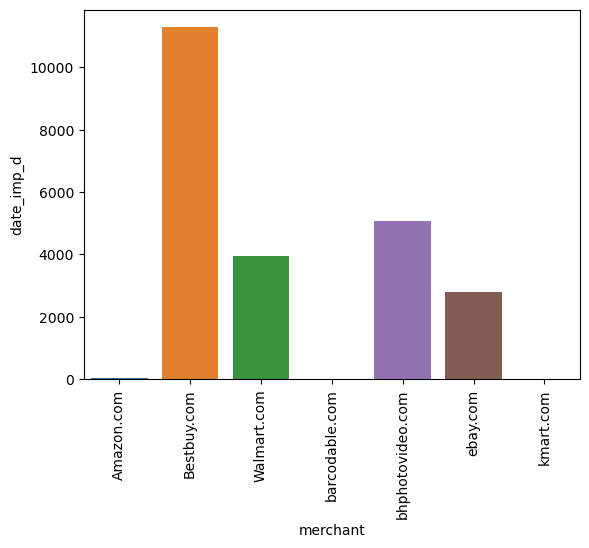

In [25]:
aux = df2[['date_imp_d', 'merchant']].groupby('merchant').count().reset_index()
plt.xticks(rotation=90)
sns.barplot(x='merchant', y='date_imp_d', data=aux);

In [13]:
#store selection
df_best = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart = df2[df2['merchant'] == 'Walmart.com']
df_ebay = df2[df2['merchant'] == 'ebay.com']

## 3.3 which category sells the most?

### 3.3.1 general

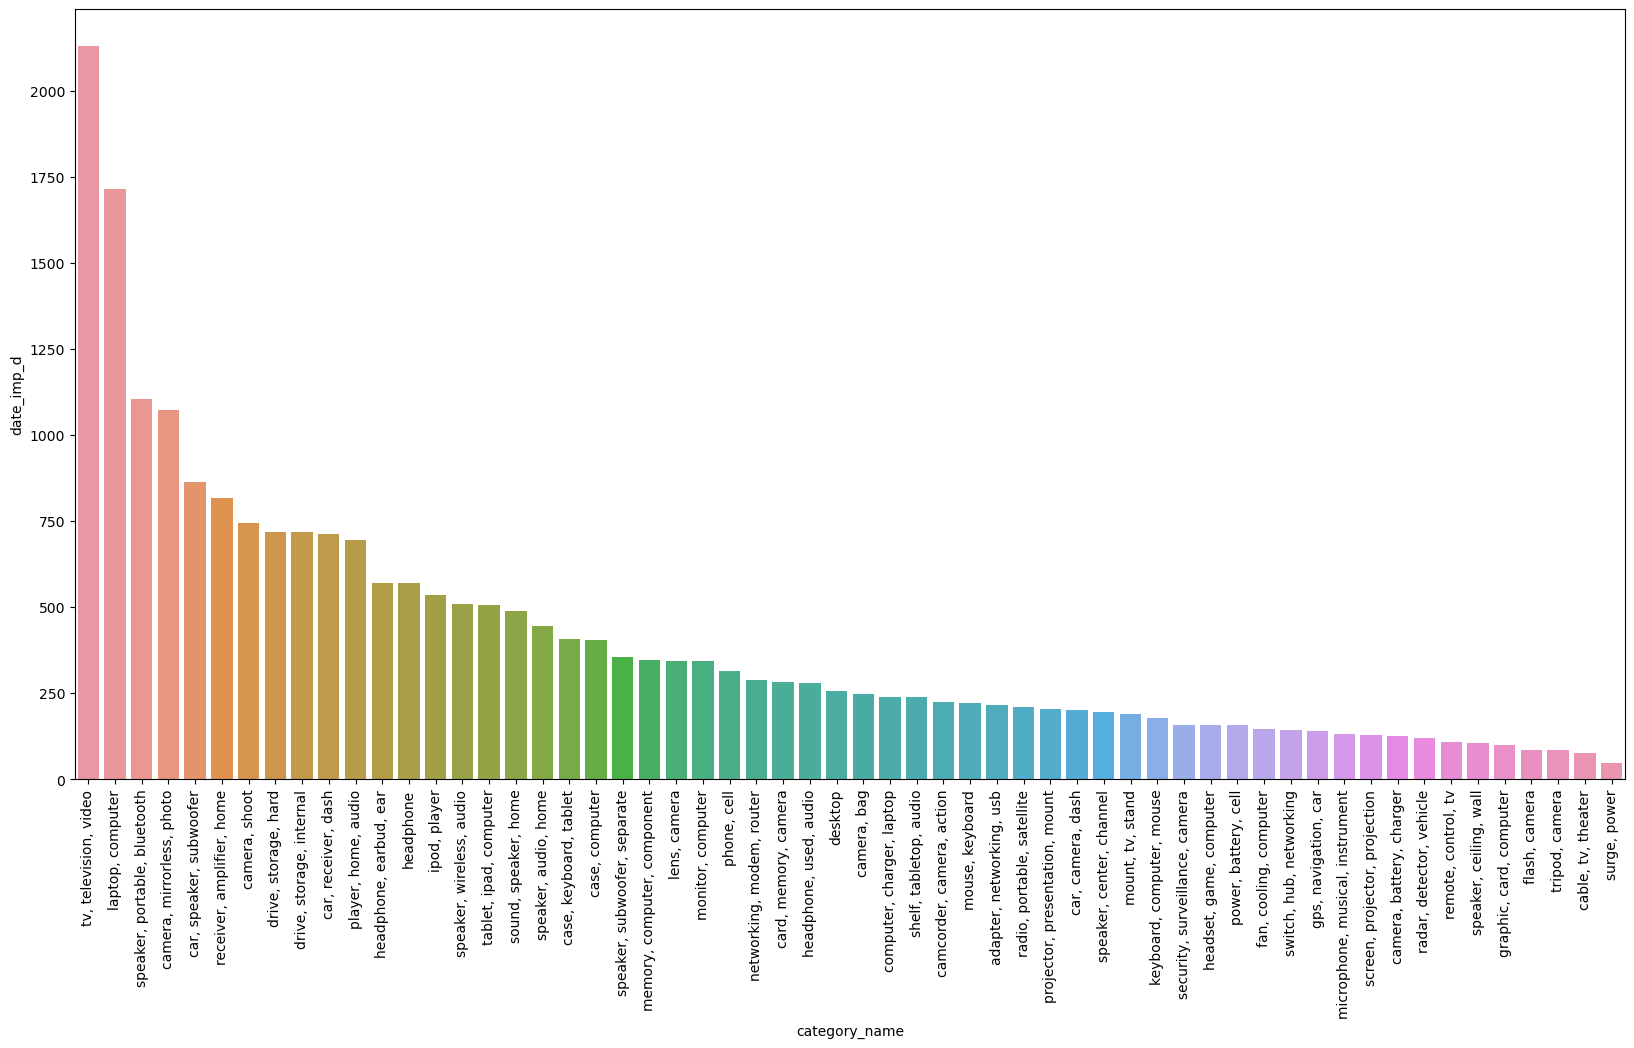

In [33]:
plt.figure(figsize=(20,10))
aux = df2[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux);

### 3.3.2 by store

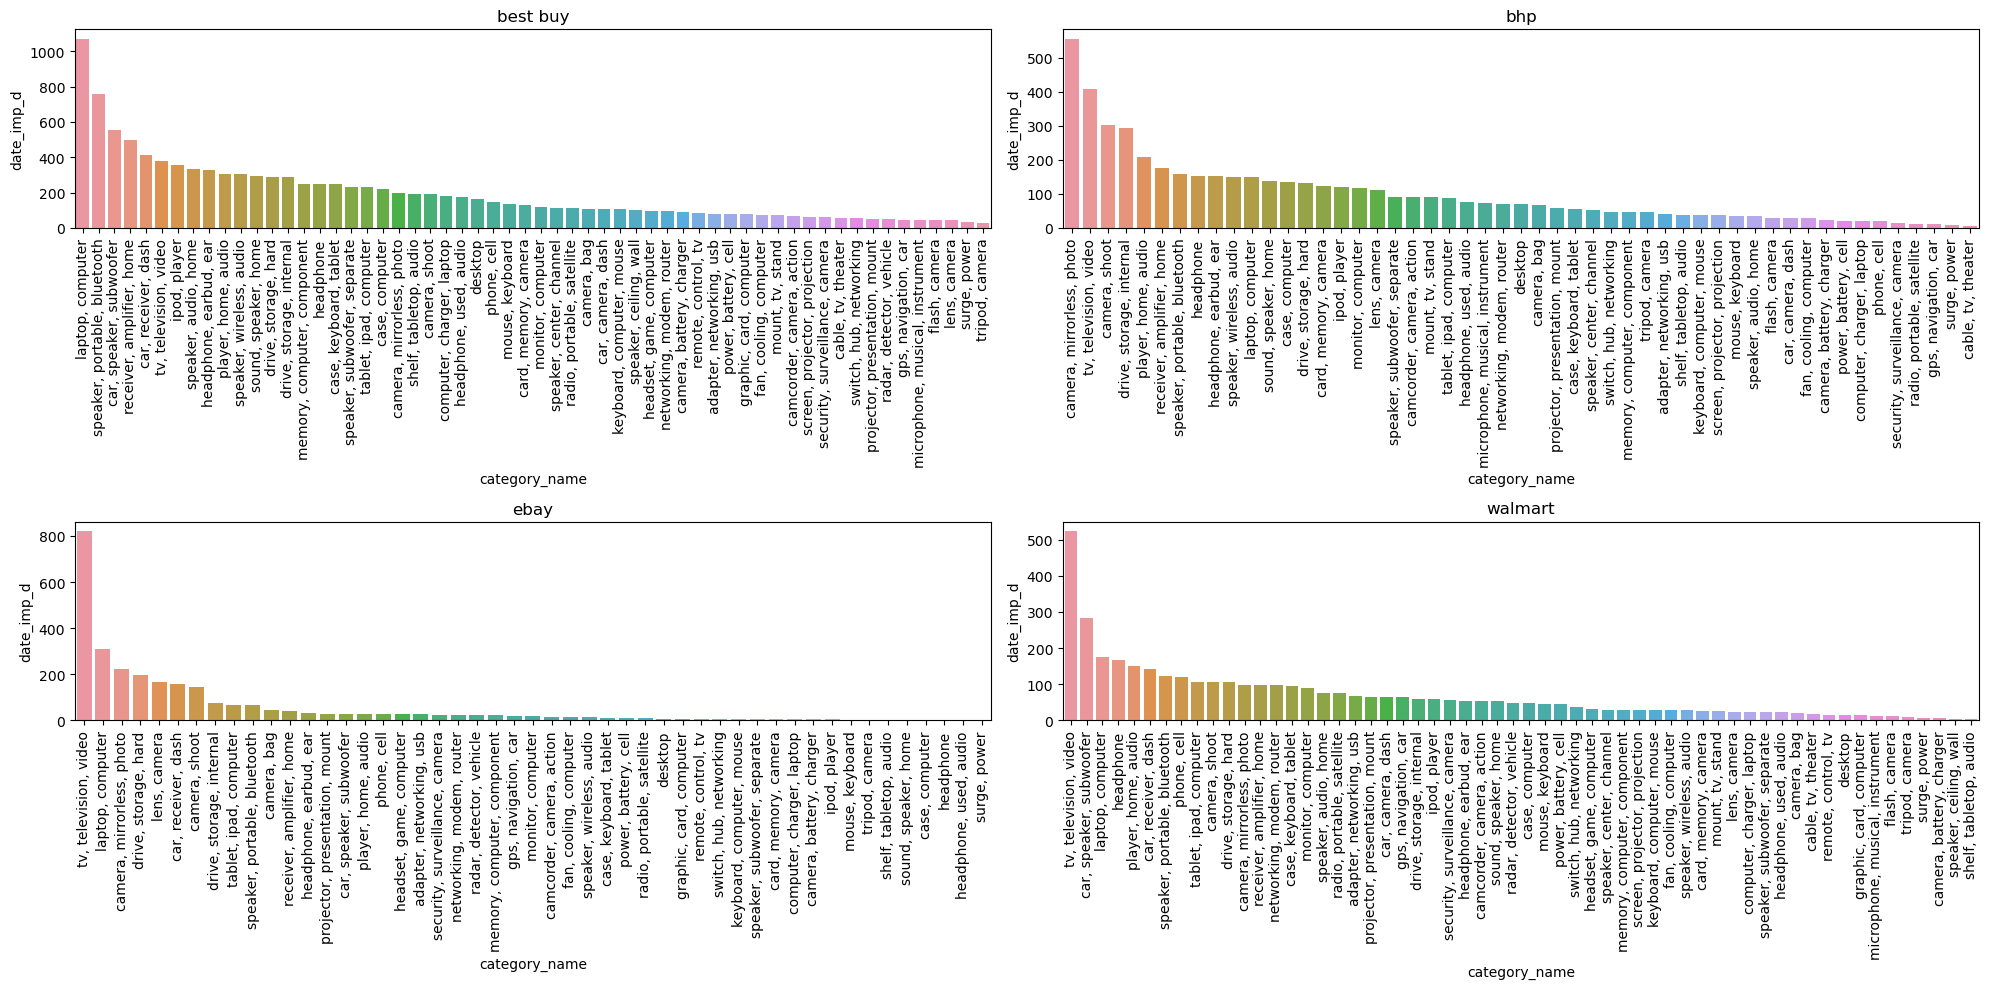

In [37]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux1);
plt.title('best buy')

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux2);
plt.title('bhp')

plt.subplot(2, 2, 3)
aux3 = df_ebay[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux3);
plt.title('ebay')

plt.subplot(2, 2, 4)
aux4 = df_walmart[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux4);
plt.title('walmart')

plt.tight_layout()

## 3.4 what is the best-selling brand?

### 3.4.1 general

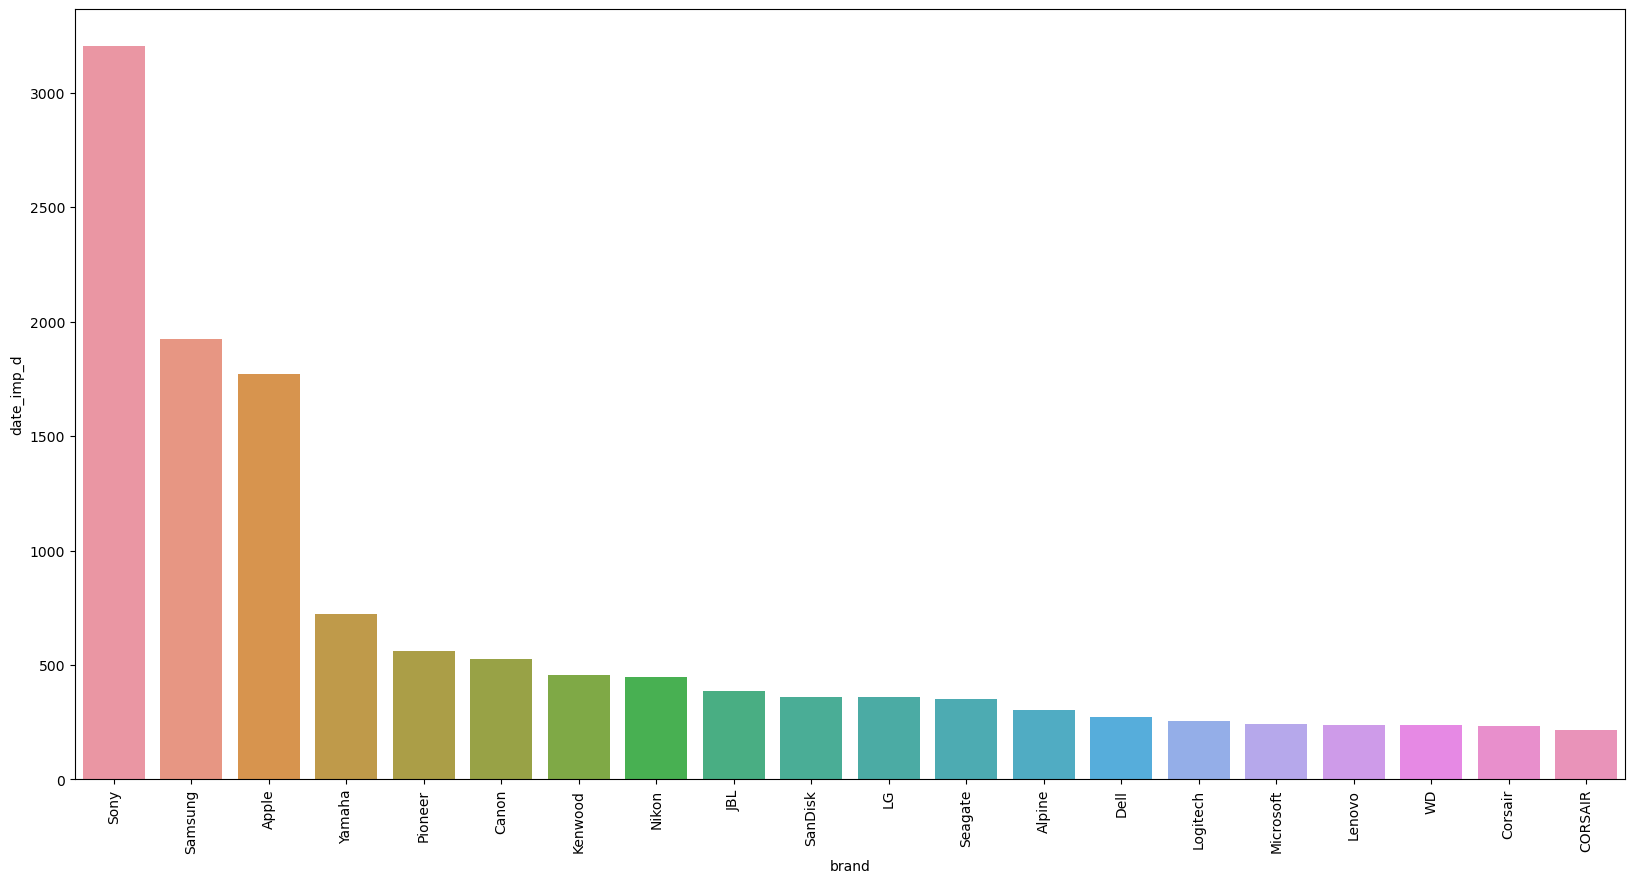

In [41]:
plt.figure(figsize=(20,10))
aux = df2[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(x='brand', y='date_imp_d', data=aux);

### 3.4.2 by store

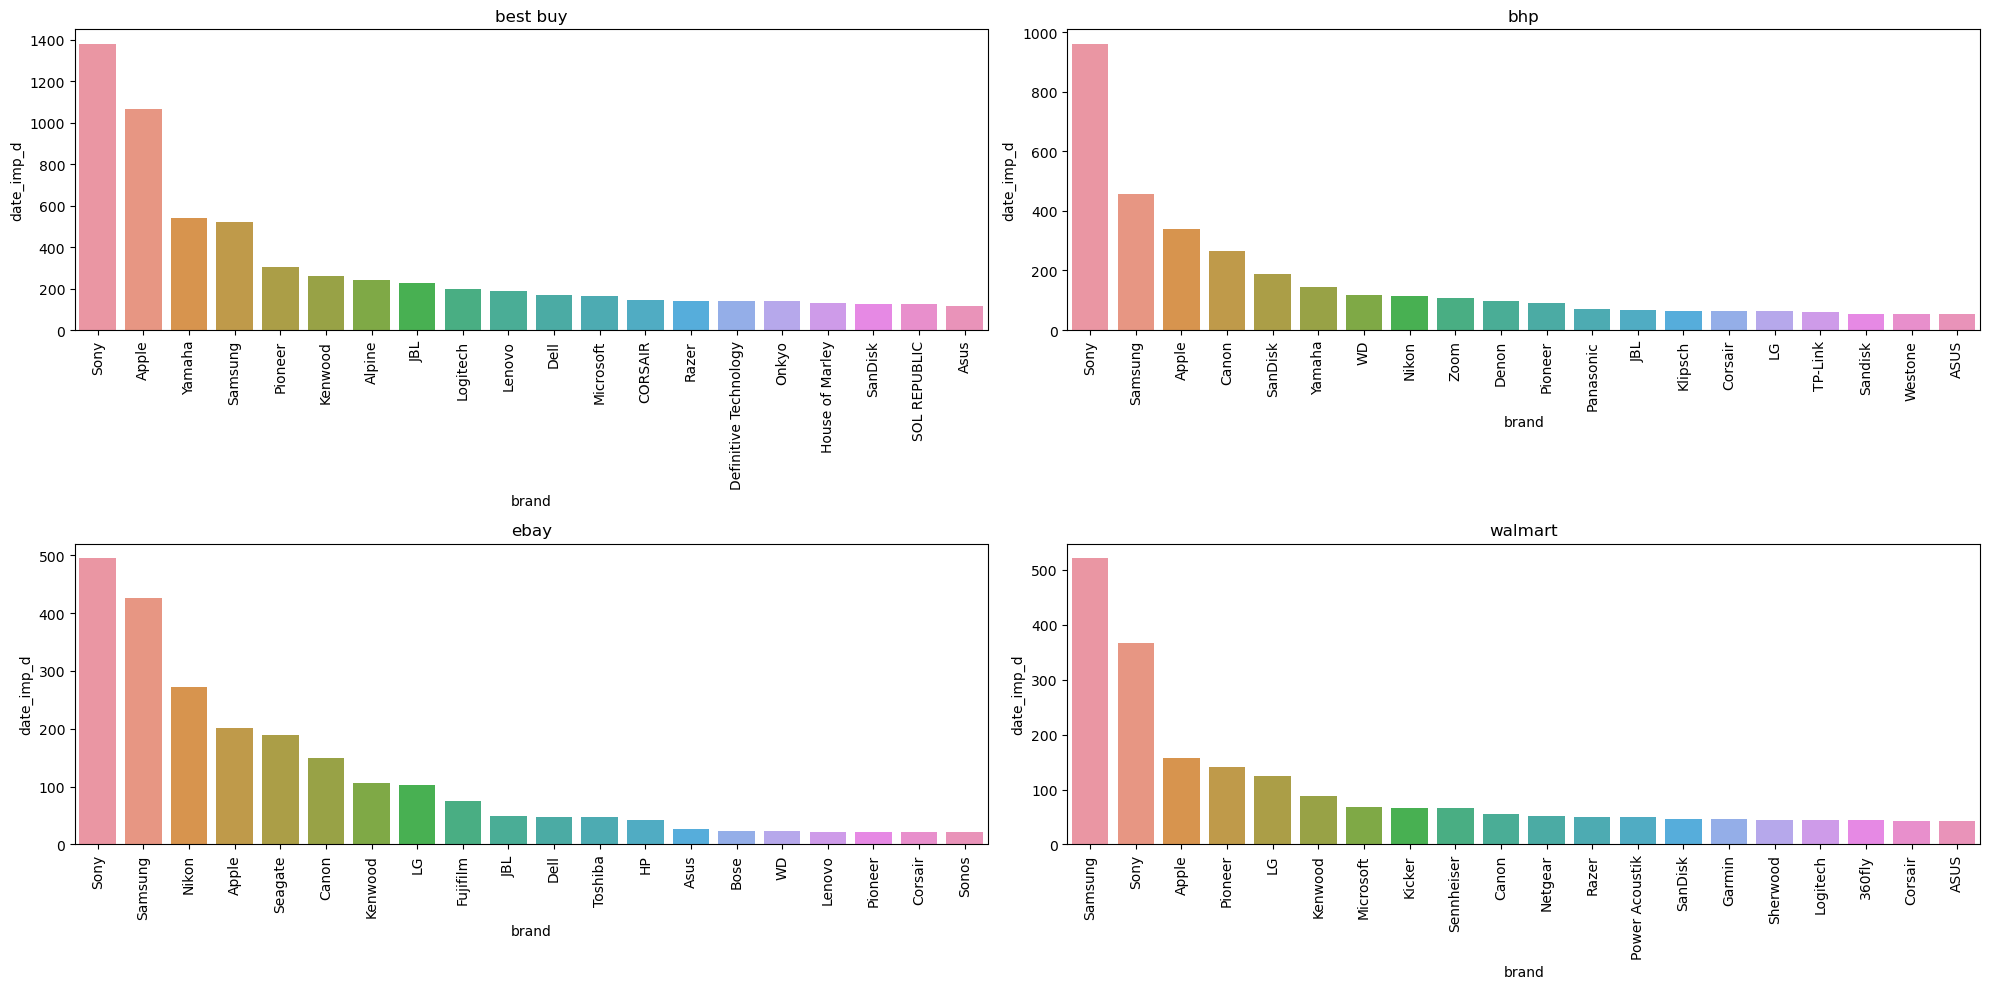

In [44]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(x='brand', y='date_imp_d', data=aux1);
plt.title('best buy')

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(x='brand', y='date_imp_d', data=aux2);
plt.title('bhp')

plt.subplot(2, 2, 3)
aux3 = df_ebay[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(x='brand', y='date_imp_d', data=aux3);
plt.title('ebay')

plt.subplot(2, 2, 4)
aux4 = df_walmart[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(x='brand', y='date_imp_d', data=aux4);
plt.title('walmart')

plt.tight_layout()

## 3.5 what are the best-selling days?

### 3.5.1 general

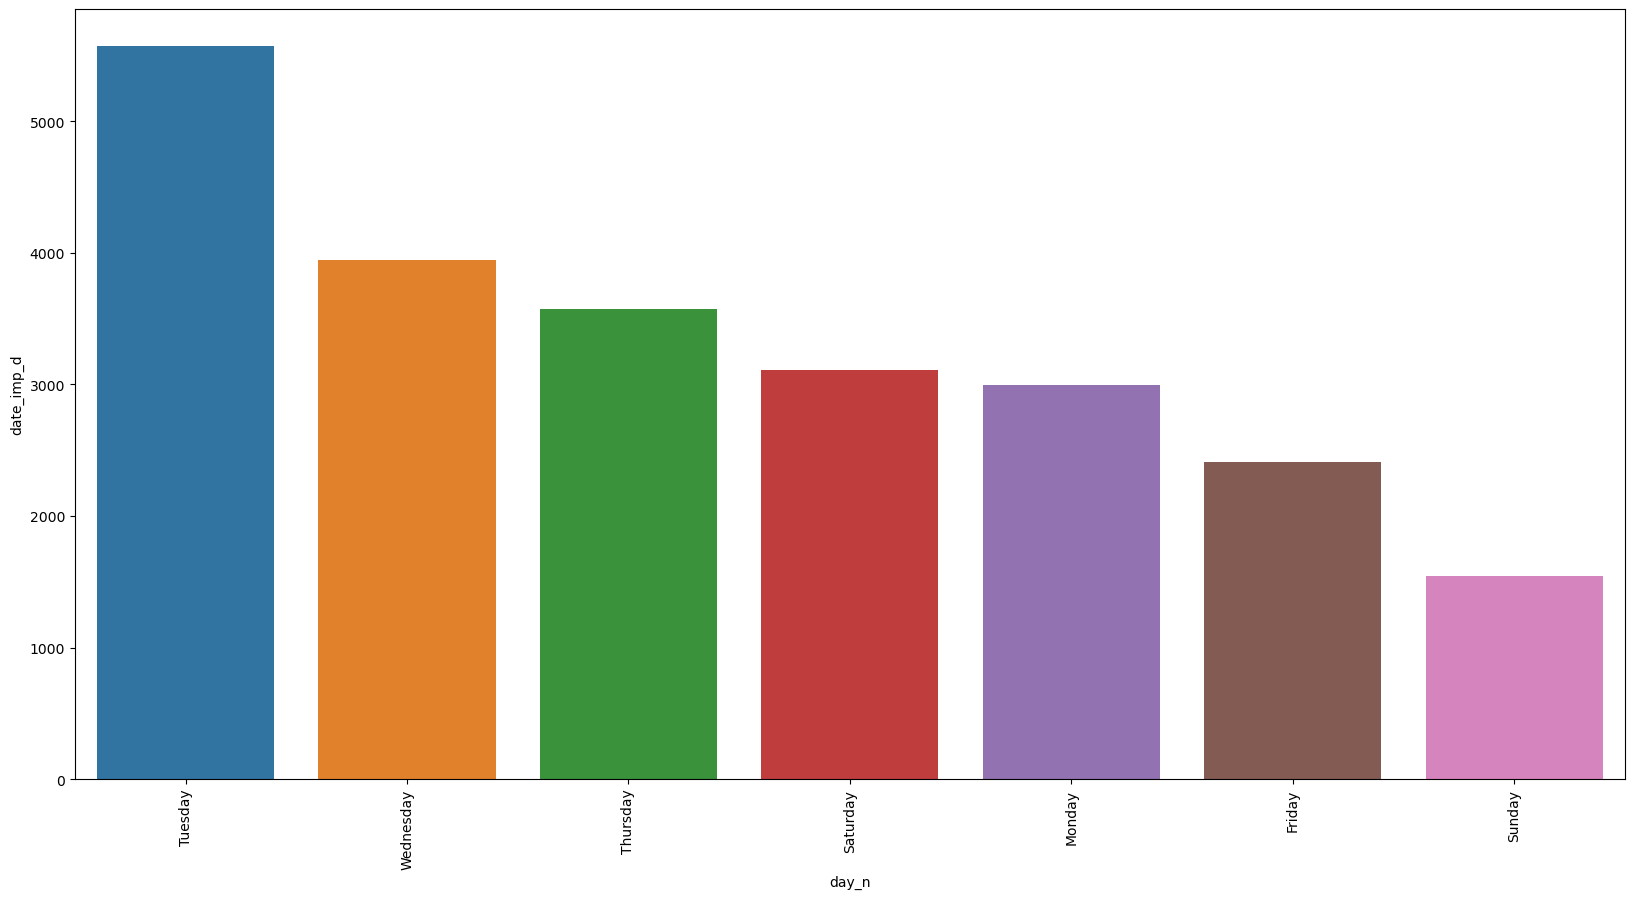

In [46]:
plt.figure(figsize=(20,10))
aux = df2[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='day_n', y='date_imp_d', data=aux);

### 3.5.2 by store

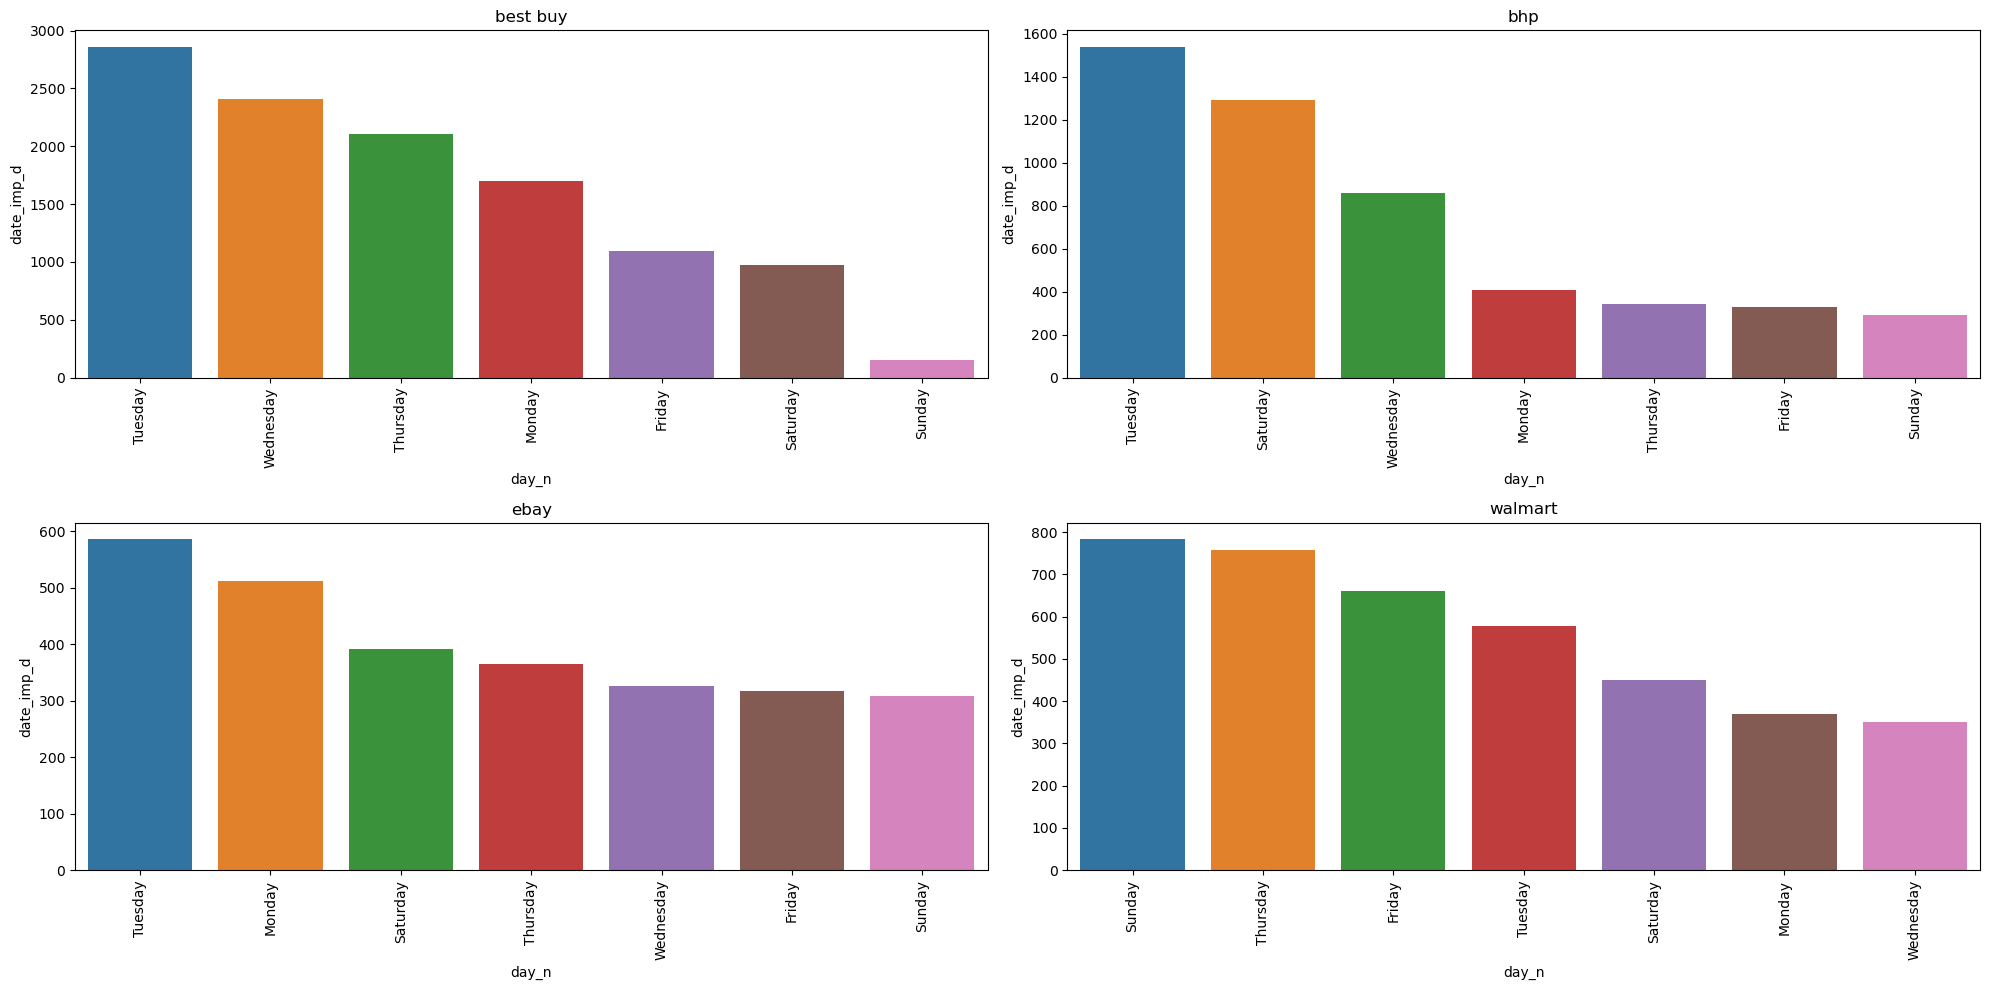

In [48]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(x='day_n', y='date_imp_d', data=aux1);
plt.title('best buy')

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(x='day_n', y='date_imp_d', data=aux2);
plt.title('bhp')

plt.subplot(2, 2, 3)
aux3 = df_ebay[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(x='day_n', y='date_imp_d', data=aux3);
plt.title('ebay')

plt.subplot(2, 2, 4)
aux4 = df_walmart[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False).head(20)
plt.xticks(rotation=90)
sns.barplot(x='day_n', y='date_imp_d', data=aux4);
plt.title('walmart')

plt.tight_layout()

## 3.6 what are the best-selling months?

### 3.6.1 general

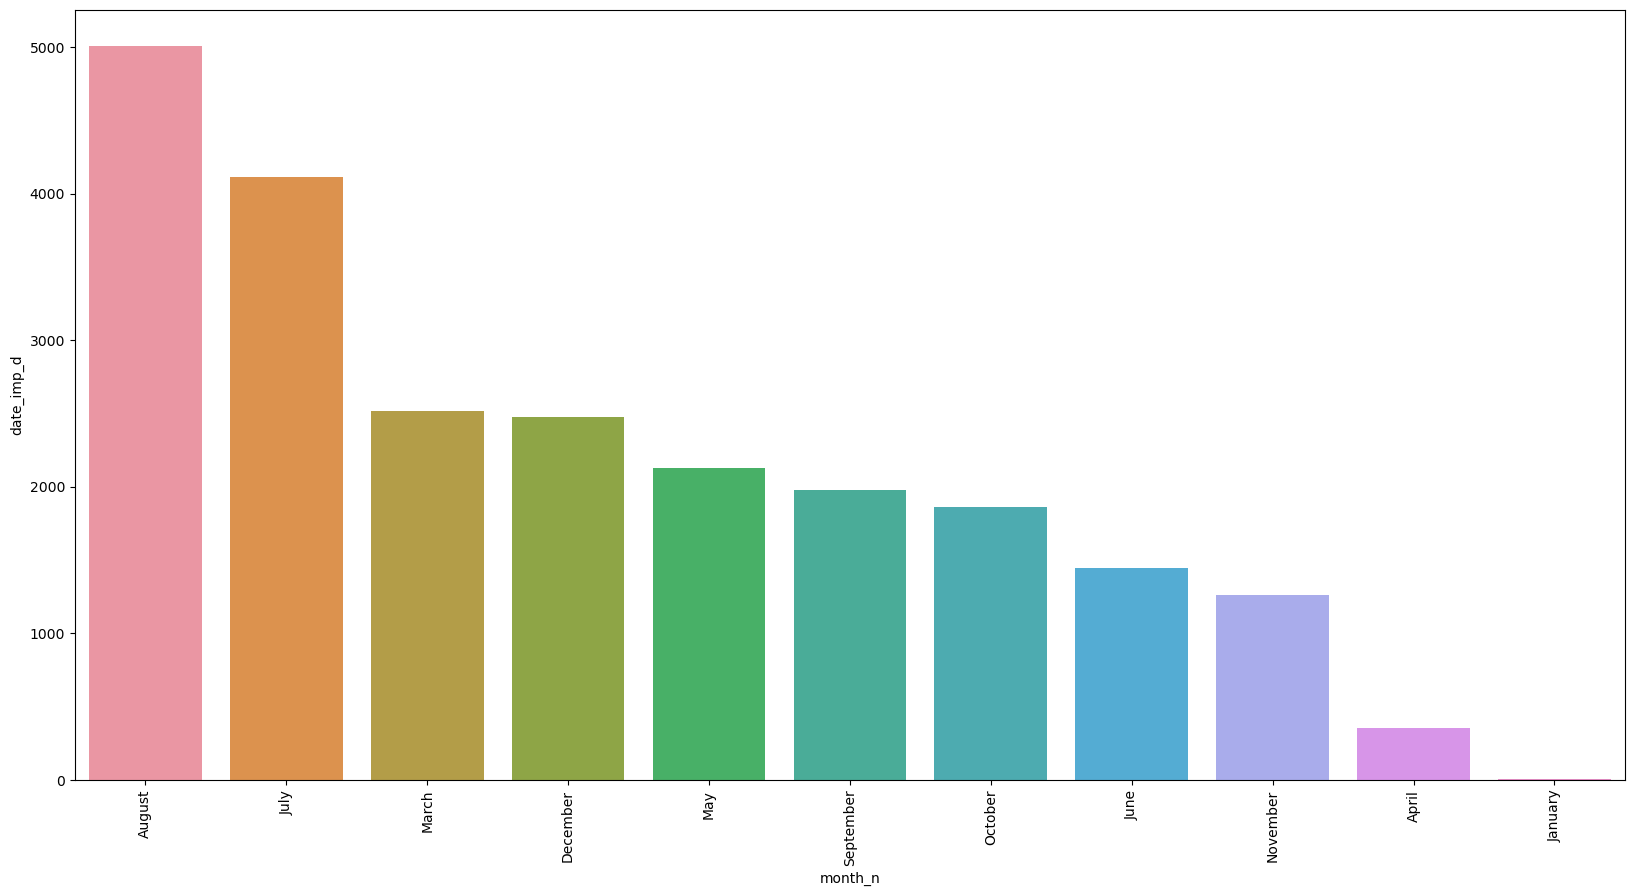

In [10]:
plt.figure(figsize=(20,10))
aux = df2[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='month_n', y='date_imp_d', data=aux);

### 3.6.2 by store

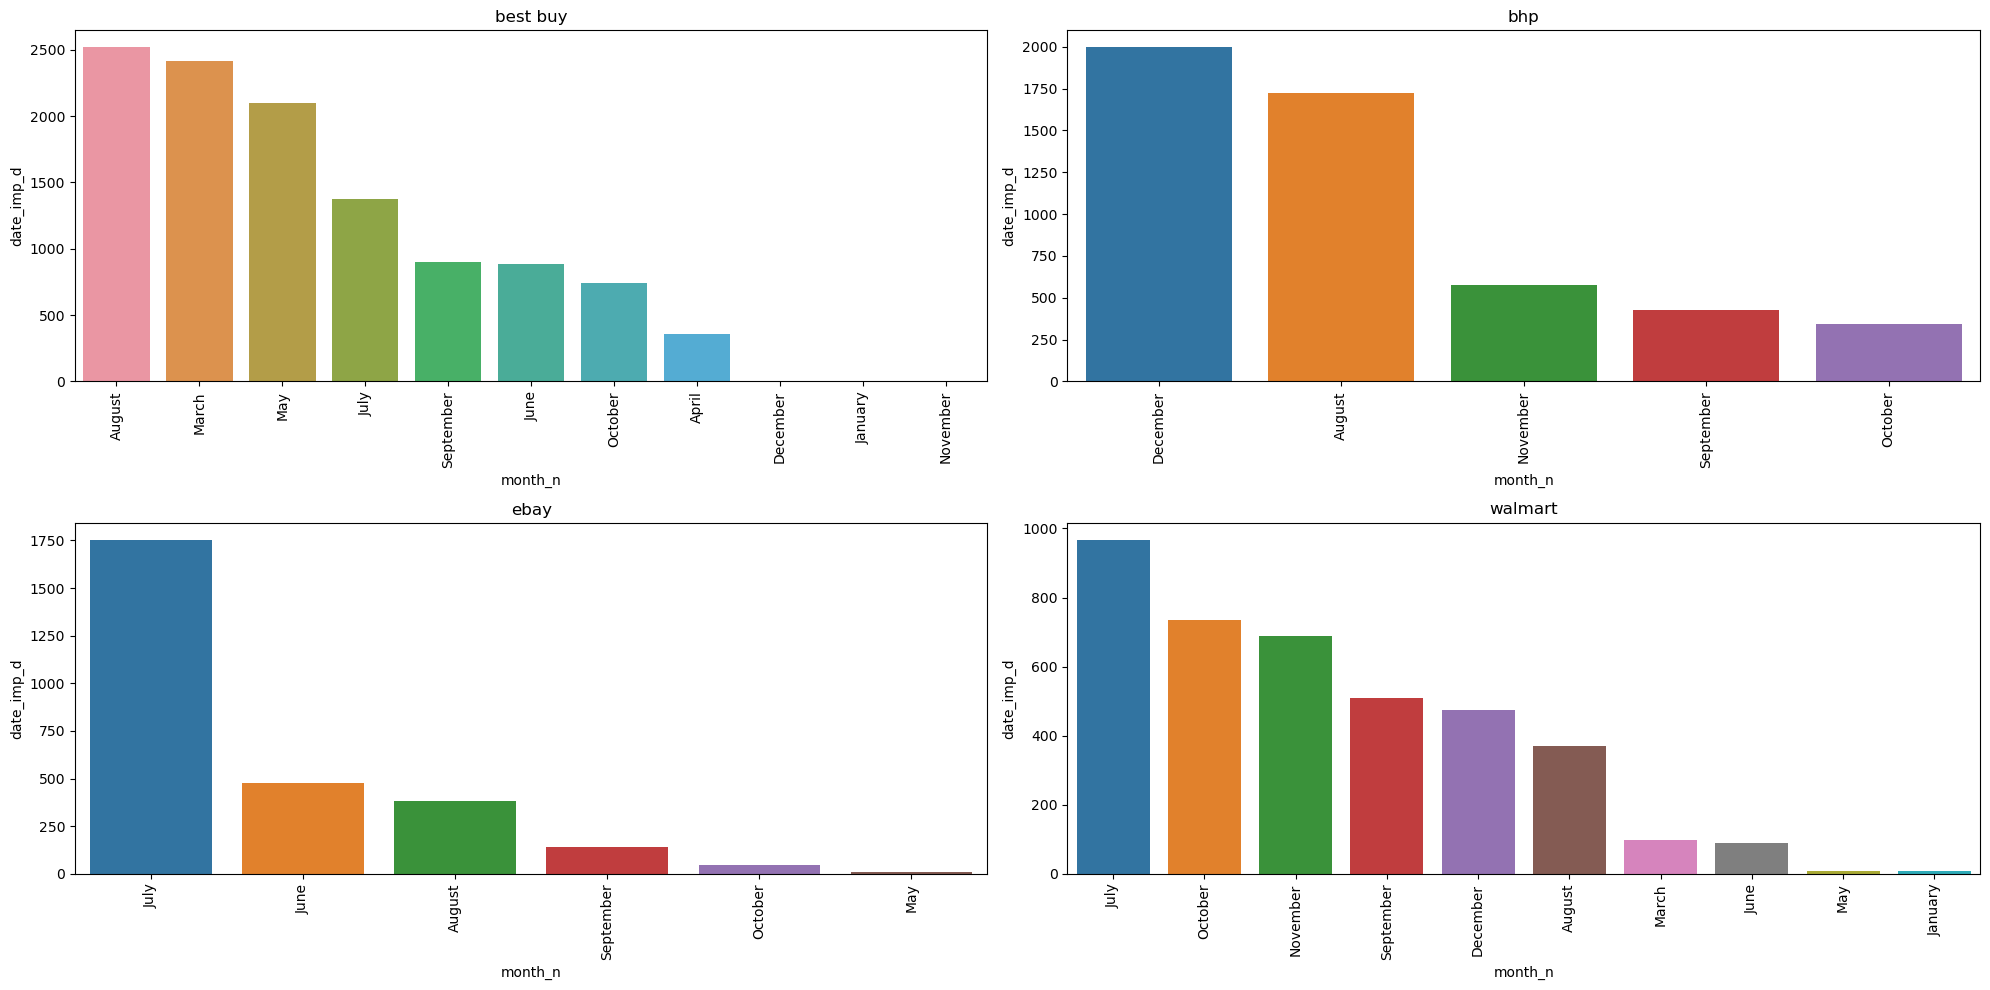

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='month_n', y='date_imp_d', data=aux1);
plt.title('best buy')

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='month_n', y='date_imp_d', data=aux2);
plt.title('bhp')

plt.subplot(2, 2, 3)
aux3 = df_ebay[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='month_n', y='date_imp_d', data=aux3);
plt.title('ebay')

plt.subplot(2, 2, 4)
aux4 = df_walmart[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
sns.barplot(x='month_n', y='date_imp_d', data=aux4);
plt.title('walmart')

plt.tight_layout()

## 3.7 what are the best-selling weeks?

### 3.7.1 general

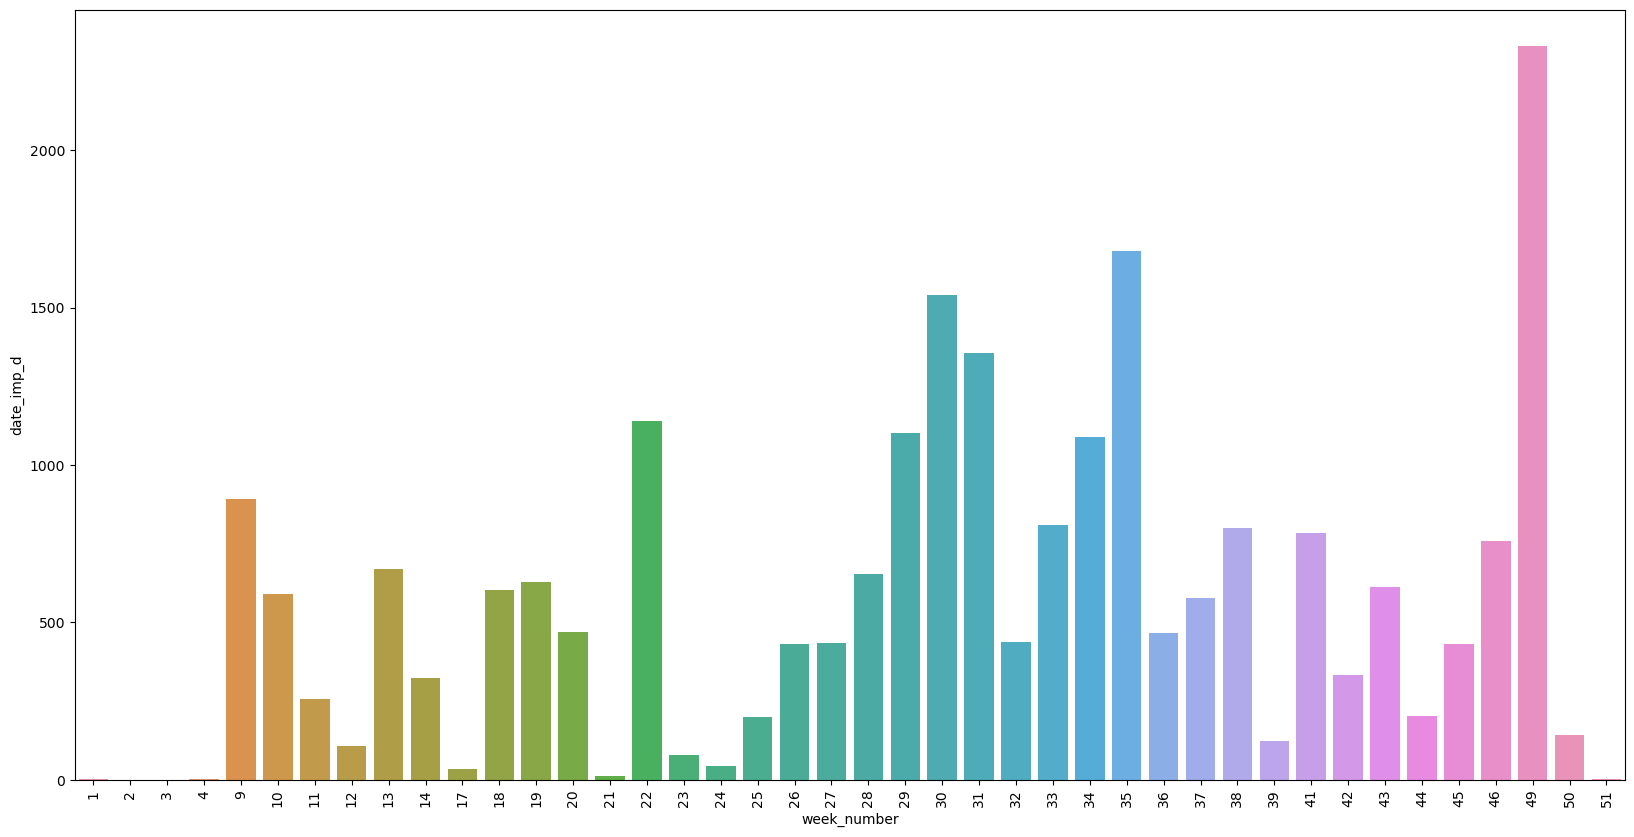

In [17]:
plt.figure(figsize=(20,10))
aux = df2[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index()
plt.xticks(rotation=90)
sns.barplot(x='week_number', y='date_imp_d', data=aux);

### 3.7.2 by store

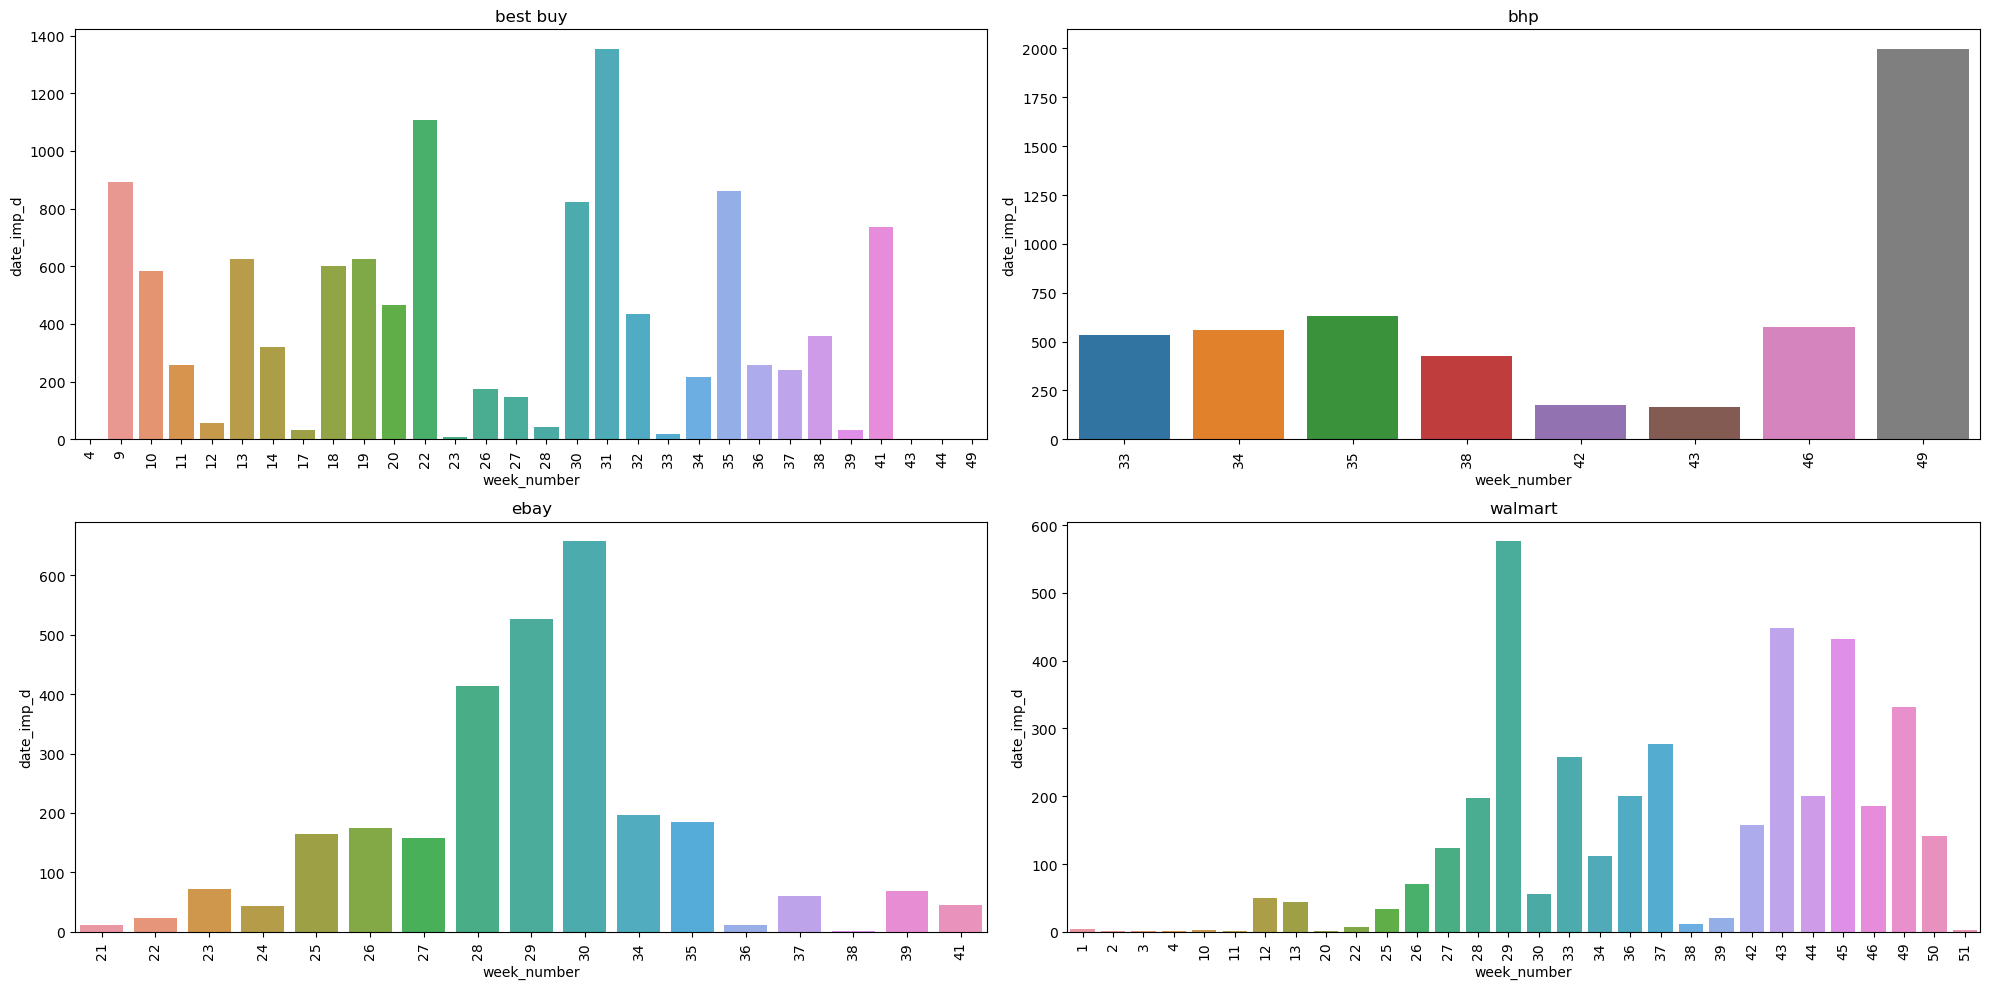

In [23]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index()
plt.xticks(rotation=90)
sns.barplot(x='week_number', y='date_imp_d', data=aux1);
plt.title('best buy')

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index()
plt.xticks(rotation=90)
sns.barplot(x='week_number', y='date_imp_d', data=aux2);
plt.title('bhp')

plt.subplot(2, 2, 3)
aux3 = df_ebay[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index()
plt.xticks(rotation=90)
sns.barplot(x='week_number', y='date_imp_d', data=aux3);
plt.title('ebay')

plt.subplot(2, 2, 4)
aux4 = df_walmart[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index()
plt.xticks(rotation=90)
sns.barplot(x='week_number', y='date_imp_d', data=aux4);
plt.title('walmart')

plt.tight_layout()

# 4.0 feature engineering

In [24]:
df3 = df2.copy()

## 4.1 best-selling category for Bestbuy

In [32]:
df_lc = df_best[df_best['category_name'] == 'laptop, computer']

aux = df_lc.groupby(['name', 'week_number']).agg({'price': 'mean', 'date_imp_d': 'count'}).reset_index()
aux.head()

name  week_number    price  date_imp_d
0  12 MacBook (Mid 2017, Gold)           30  1599.99           1
1  12 MacBook (Mid 2017, Gold)           31  1551.99           8
2  12 MacBook (Mid 2017, Gold)           33  1454.99           2
3  12 MacBook (Mid 2017, Gold)           34  1551.99           2
4  12 MacBook (Mid 2017, Gold)           35  1474.49           4

## 4.2 creating dataframe for X

In [80]:
x_price = aux.pivot(index='week_number', columns='name', values='price')
x_price_df = pd.DataFrame(x_price.to_records())
x_price_df.head()

week_number  12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
0            4                          NaN                            NaN   
1            9                          NaN                            NaN   
2           10                          NaN                            NaN   
3           11                          NaN                            NaN   
4           13                          NaN                            NaN   

   12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
0                                           NaN   
1                                       426.495   
2                                       426.495   
3                                           NaN   
4                                       449.000   

   13.3 MacBook Air (Mid 2017, Silver)  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
0                                                NaN     
1                                            2799.99     
2                                            2799.99     
3                                            2715.99     
4                                            2547.99     

   15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
0                                                NaN         
1                                            2599.99         
2                                            2599.99         
3                                            2482.99         
4                                            2353.99         

   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

   Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
0                                                NaN                                                                                        
1                                             899.99                                                                                        
2                                             899.99                                                                                        
3                                                NaN                                                                                        
4                                             849.99                                                                                        

   Acer 15.6 Chromebook CB5-571-C4G4  ...  \
0                                NaN  ...   
1                            236.495  ...   
2                            238.995  ...   
3                                NaN  ...   
4                            223.995  ...   

   HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"  \
0                                                NaN                                 
1                                             799.99                                 
2                                             819.99                                 
3                                             819.99                                 
4                                             819.99               

## 4.3 creating dataframe for Y

In [81]:
y_demand = aux.pivot(index='week_number', columns='name', values='date_imp_d')
y_demand_df = pd.DataFrame(y_demand.to_records())
y_demand_df.head()

week_number  12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
0            4                          NaN                            NaN   
1            9                          NaN                            NaN   
2           10                          NaN                            NaN   
3           11                          NaN                            NaN   
4           13                          NaN                            NaN   

   12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
0                                           NaN   
1                                           4.0   
2                                           2.0   
3                                           NaN   
4                                           1.0   

   13.3 MacBook Air (Mid 2017, Silver)  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

   15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
0                                                NaN     
1                                                3.0     
2                                                1.0     
3                                                2.0     
4                                                2.0     

   15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
0                                                NaN         
1                                                6.0         
2                                                4.0         
3                                                4.0         
4                                                8.0         

   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
0                                                NaN                                                     
1                                                NaN                                                     
2                                                NaN                                                     
3                                                NaN                                                     
4                                                NaN                                                     

   Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
0                                                NaN                                                                                        
1                                                2.0                                                                                        
2                                                1.0                                                                                        
3                                                NaN                                                                                        
4                                                1.0                                                                                        

   Acer 15.6 Chromebook CB5-571-C4G4  ...  \
0                                NaN  ...   
1                                4.0  ...   
2                                2.0  ...   
3                                NaN  ...   
4                                2.0  ...   

   HP - ProBook 14 Laptop - Intel Core i5 - 4GB Memory - 500GB Hard Drive - Black"  \
0                                                NaN                                 
1                                                1.0                                 
2                                                1.0                                 
3                                                1.0                                 
4                                                1.0               

## 4.4 check NA

In [82]:
na_price = x_price.isna().sum()
na_demand = y_demand.isna().sum()
print(f' NA in x_price: {na_price.sum()}')
print(f' NA in y_demand: {na_demand.sum()}')

 NA in x_price: 555
 NA in y_demand: 555


## 4.5 replace NA

In [83]:
#x_price
median_price = np.round(x_price.median(), 2)
x_price.fillna(median_price, inplace=True)
x_price.head()

name         12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
week_number                                                               
4                                1551.99                        1299.99   
9                                1551.99                        1299.99   
10                               1551.99                        1299.99   
11                               1551.99                        1299.99   
13                               1551.99                        1299.99   

name         12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
week_number                                                 
4                                                 415.500   
9                                                 426.495   
10                                                426.495   
11                                                415.500   
13                                                449.000   

name         13.3 MacBook Air (Mid 2017, Silver)  \
week_number                                        
4                                         949.99   
9                                         949.99   
10                                        949.99   
11                                        949.99   
13                                        949.99   

name         15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
week_number                                                        
4                                                      2618.99     
9                                                      2799.99     
10                                                     2799.99     
11                                                     2715.99     
13                                                     2547.99     

name         15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
week_number                                                            
4                                                      2353.99         
9                                                      2599.99         
10                                                     2599.99         
11                                                     2482.99         
13                                                     2353.99         

name         ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
week_number                                                                                                        
4                                                       304.99                                                     
9                                                       304.99                                                     
10                                                      304.99                                                     
11                                                      304.99                                                     
13                                                      304.99                                                     

name         Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
week_number                                                                                                                                           
4                                                       829.99                                                                                        
9                                                       899.99                                                                                        
10                                                      899.99                                                                                        
11                                                      829.99                                                                     

In [84]:
#y_demand
y_demand.fillna(0, inplace=True)
y_demand.head()

name         12 MacBook (Mid 2017, Gold)  12 MacBook (Mid 2017, Silver)  \
week_number                                                               
4                                    0.0                            0.0   
9                                    0.0                            0.0   
10                                   0.0                            0.0   
11                                   0.0                            0.0   
13                                   0.0                            0.0   

name         12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  \
week_number                                                 
4                                                     0.0   
9                                                     4.0   
10                                                    2.0   
11                                                    0.0   
13                                                    1.0   

name         13.3 MacBook Air (Mid 2017, Silver)  \
week_number                                        
4                                            0.0   
9                                            0.0   
10                                           0.0   
11                                           0.0   
13                                           0.0   

name         15.4 MacBook Pro with Touch Bar (Late 2016, Silver)  \
week_number                                                        
4                                                          0.0     
9                                                          3.0     
10                                                         1.0     
11                                                         2.0     
13                                                         2.0     

name         15.4 MacBook Pro with Touch Bar (Late 2016, Space Gray)  \
week_number                                                            
4                                                          0.0         
9                                                          6.0         
10                                                         4.0         
11                                                         4.0         
13                                                         8.0         

name         ASUS VivoBook Max X541SA 15.6Inch Laptop Intel Pentium 4GB Memory 500GB HD Matte IMR X541SA-PD0703X  \
week_number                                                                                                        
4                                                          0.0                                                     
9                                                          0.0                                                     
10                                                         0.0                                                     
11                                                         0.0                                                     
13                                                         0.0                                                     

name         Acer - 2-in-1 15.6 Refurbished Touch-Screen Laptop - Intel Core i7 - 12GB Memory - NVIDIA GeForce 940MX - 1TB Hard Drive - Steel gray"  \
week_number                                                                                                                                           
4                                                          0.0                                                                                        
9                                                          2.0                                                                                        
10                                                         1.0                                                                                        
11                                                         0.0                                                                     

## 4.6 descriptive statistics

### 4.6.1 for X

In [85]:
#central tendency
ct1 = pd.DataFrame(x_price.apply(np.mean)).T
ct2 = pd.DataFrame(x_price.apply(np.median)).T

#dispersion
d1 = pd.DataFrame(x_price.apply(max)).T
d2 = pd.DataFrame(x_price.apply(min)).T
d3 = pd.DataFrame(x_price.apply(np.std)).T
d4 = pd.DataFrame(x_price.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(x_price.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(x_price.apply(lambda x: x.kurtosis())).T

x = pd.concat([d2, d1, d4, ct1, ct2, d3, d5, d6]).T.reset_index()
x.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
x

att       min      max  \
0                         12 MacBook (Mid 2017, Gold)  1454.990  1599.99   
1                       12 MacBook (Mid 2017, Silver)  1234.990  1299.99   
2        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus   372.995   449.00   
3                 13.3 MacBook Air (Mid 2017, Silver)   911.990   969.99   
4   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  2327.990  2799.99   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  2023.990  2599.99   
6   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   237.490   313.49   
7   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...   764.990   899.99   
8                   Acer 15.6 Chromebook CB5-571-C4G4   199.990   249.00   
9   Alienware - R3 17.3 Laptop - Intel Core i7 - 1...  1599.990  1899.99   
10  Apple - MacBook Pro® - 13 Display - Intel Core...  1315.990  1454.99   
11  Apple - MacBook Pro® - 13 Display - Intel Core...  1315.990  1454.99   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  1794.490  1999.99   
13                  Apple 13.3 MacBook Air ( Silver)"   600.495  1234.99   
14  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...  1079.990  1519.99   
15  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   700.495  1432.49   
16  Apple MacBook Pro with Touch Bar - 13.3 - Core...  1610.740  1999.99   
17  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...  1091.990  1329.99   
18  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   719.990   799.99   
19  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...   700.495  1399.99   
20  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...   900.495  2199.99   
21  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...  1349.990  1799.99   
22  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  1601.990  1899.99   
23  Details About Apple Macbook Air 13.3 Laptop (e...   727.490   799.99   
24  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...   441.990   657.99   
25  Details About Dell Inspiron I75675650blkpus 15...   763.990   868.49   
26  Details About Openbox Excellent: Asus Rog Gl50...  1063.490  1249.99   
27  Details About Razer Blade Laptop 14 Full Hd (i...  1050.495  2099.99   
28   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"   123.490   189.99   
29  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...   799.990   819.99   
30  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...   427.490   499.99   
31  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   170.990   229.99   
32  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...   513.990   664.99   
33  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...   314.990   474.99   
34  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...   316.990   383.99   
35  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  2299.990  2399.99   
36  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...   554.990   949.99   
37  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  3674.990  4399.99   
38  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...   569.990   617.49   

       range         mean   median         std      skew   kurtosis  
0    145.000  1547.124615  1551.99   25.648346 -2.457686   8.310054  
1     65.000  1295.990000  1299.99   14.317821 -3.735032  13.784949  
2     76.005   413.189808   415.50   15.423120 -1.054924   2.830858  
3     58.000   949.297692   949.99    8.393080 -2.975611  16.702015  
4    472.000  2607.393846  2618.99  112.833610 -1.131897   2.049122  
5    576.000  2346.913077  2353.99  122.523757 -0.274833   1.347179  
6     76.000   299.720769   304.99   16.347918 -2.916993   8.218479  
7    135.000   834.028462   829.99   27.804926  0.937281   2.943939  
8     49.010   242.479231   249.00   14.017001 -2.306458   4.514429  
9    300.000  1879.643846  1899.99   71.165540 -3.486137  11.301211  
10   139.000  1402.393846  1409.99   32.489945 -1.674626   2.634043  
11   139.000  1386.816923  1387.49   31.076191 -0.336021   1.248185  
12   205.500  1882.970769  1879.99   35.218134  1.074956   5.009074  
13   634.495  1105.894231  11

### 4.6.2 for Y

In [86]:
#central tendency
ct1 = pd.DataFrame(y_demand.apply(np.mean)).T
ct2 = pd.DataFrame(y_demand.apply(np.median)).T

#dispersion
d1 = pd.DataFrame(y_demand.apply(max)).T
d2 = pd.DataFrame(y_demand.apply(min)).T
d3 = pd.DataFrame(y_demand.apply(np.std)).T
d4 = pd.DataFrame(y_demand.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(y_demand.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(y_demand.apply(lambda x: x.kurtosis())).T

y = pd.concat([d2, d1, d4, ct1, ct2, d3, d5, d6]).T.reset_index()
y.columns = ['att', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
y

att  min   max  range  \
0                         12 MacBook (Mid 2017, Gold)  0.0   8.0    8.0   
1                       12 MacBook (Mid 2017, Silver)  0.0   2.0    2.0   
2        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus  0.0   4.0    4.0   
3                 13.3 MacBook Air (Mid 2017, Silver)  0.0   2.0    2.0   
4   15.4 MacBook Pro with Touch Bar (Late 2016, Si...  0.0   6.0    6.0   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...  0.0  12.0   12.0   
6   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...  0.0   2.0    2.0   
7   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...  0.0   2.0    2.0   
8                   Acer 15.6 Chromebook CB5-571-C4G4  0.0   4.0    4.0   
9   Alienware - R3 17.3 Laptop - Intel Core i7 - 1...  0.0   2.0    2.0   
10  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
11  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
12  Apple - MacBook Pro® - 13 Display - Intel Core...  0.0   6.0    6.0   
13                  Apple 13.3 MacBook Air ( Silver)"  0.0   6.0    6.0   
14  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...  0.0   9.0    9.0   
15  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...  0.0   4.0    4.0   
16  Apple MacBook Pro with Touch Bar - 13.3 - Core...  0.0  12.0   12.0   
17  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...  0.0   4.0    4.0   
18  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...  0.0   4.0    4.0   
19  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...  0.0   4.0    4.0   
20  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...  0.0   2.0    2.0   
21  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...  0.0   4.0    4.0   
22  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...  0.0   4.0    4.0   
23  Details About Apple Macbook Air 13.3 Laptop (e...  0.0   2.0    2.0   
24  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...  0.0   4.0    4.0   
25  Details About Dell Inspiron I75675650blkpus 15...  0.0   4.0    4.0   
26  Details About Openbox Excellent: Asus Rog Gl50...  0.0   2.0    2.0   
27  Details About Razer Blade Laptop 14 Full Hd (i...  0.0   2.0    2.0   
28   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"  0.0   4.0    4.0   
29  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...  0.0   2.0    2.0   
30  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...  0.0   4.0    4.0   
31  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...  0.0   2.0    2.0   
32  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...  0.0   4.0    4.0   
33  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...  0.0   4.0    4.0   
34  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...  0.0   4.0    4.0   
35  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...  0.0   2.0    2.0   
36  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...  0.0   4.0    4.0   
37  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...  0.0   4.0    4.0   
38  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...  0.0   4.0    4.0   

        mean  median       std      skew  kurtosis  
0   0.961538     0.0  1.764626  2.738840  9.024976  
1   0.384615     0.0  0.624926  1.474017  1.189701  
2   1.038462     0.5  1.125945  0.606680 -0.428079  
3   0.384615     0.0  0.788227  1.658711  0.807453  
4   1.153846     0.0  1.609881  1.437577  1.673167  
5   3.230769     1.0  3.885948  0.951022 -0.225438  
6   0.538462     0.0  0.887120  1.105353 -0.849951  
7   0.384615     0.0  0.624926  1.474017  1.189701  
8   0.769231     1.0  0.932643  1.711207  4.066693  
9   0.615385     1.0  0.624926  0.534925 -0.518213  
10  1.076923     0.0  1.685300  1.510368  1.459409  
11  1.115385     0.0  1.671640  1.485283  1.450766  
12  0.730769     0.0  1.317273  2.680292  8.923337  
13  1.153846     0.0  1.769231  1.345266  0.665215  
14  2.615385     2.5  2.558198  0.604769 -0.449733  
15  0.692308     0.0  1.101371  1.402809  1.215839  
16  3.576923     4.0  3.078125  0.761595  0.510283  
17  0.692308     0.0  1.101371  1.402809  1.215839  
18  1.307692     1.0  1.352184  0.782681 -

# 5.0 new eda

## 5.1 for X

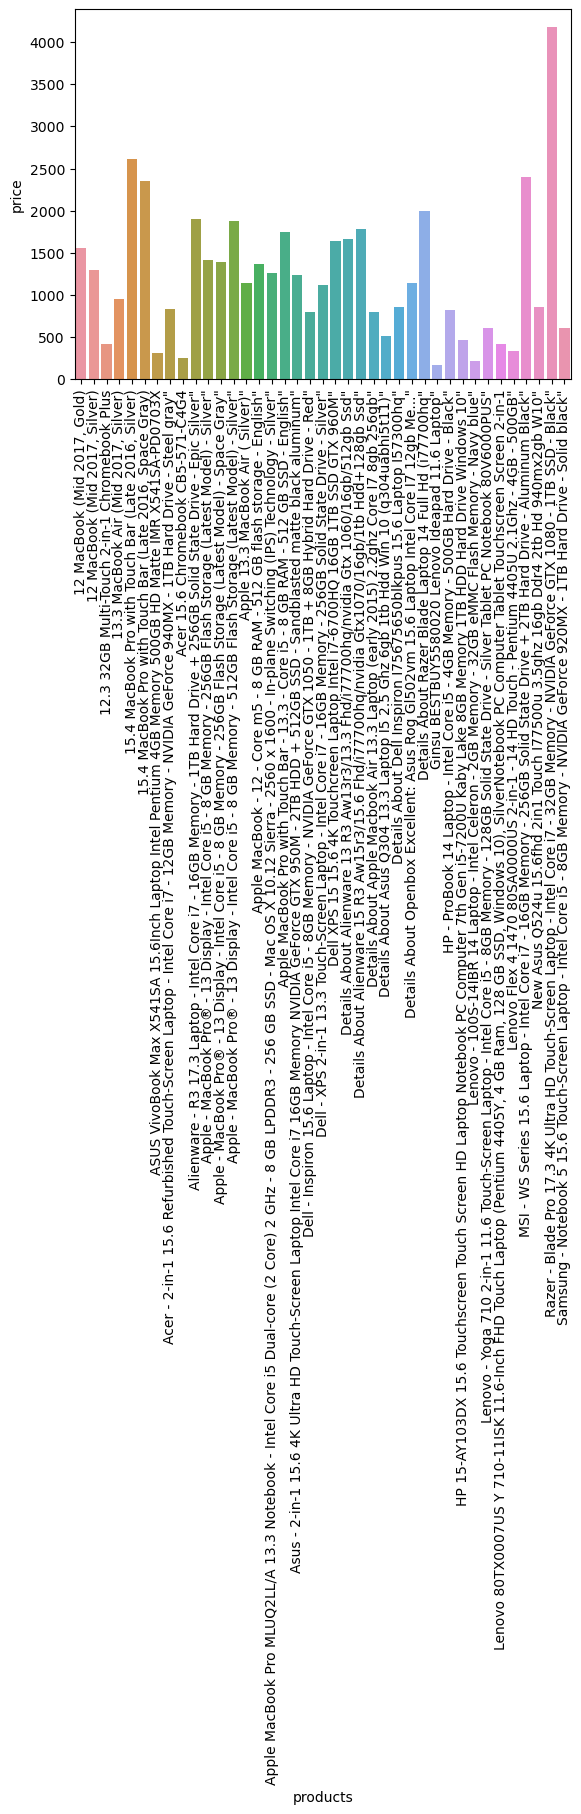

In [71]:
aux_price = pd.DataFrame(x_price.apply(lambda x: x.median())).reset_index()
aux_price.columns = ['products', 'price']
aux_price.head()
plt.xticks(rotation=90)
sns.barplot(x='products', y='price', data=aux_price);

## 5.2 for Y

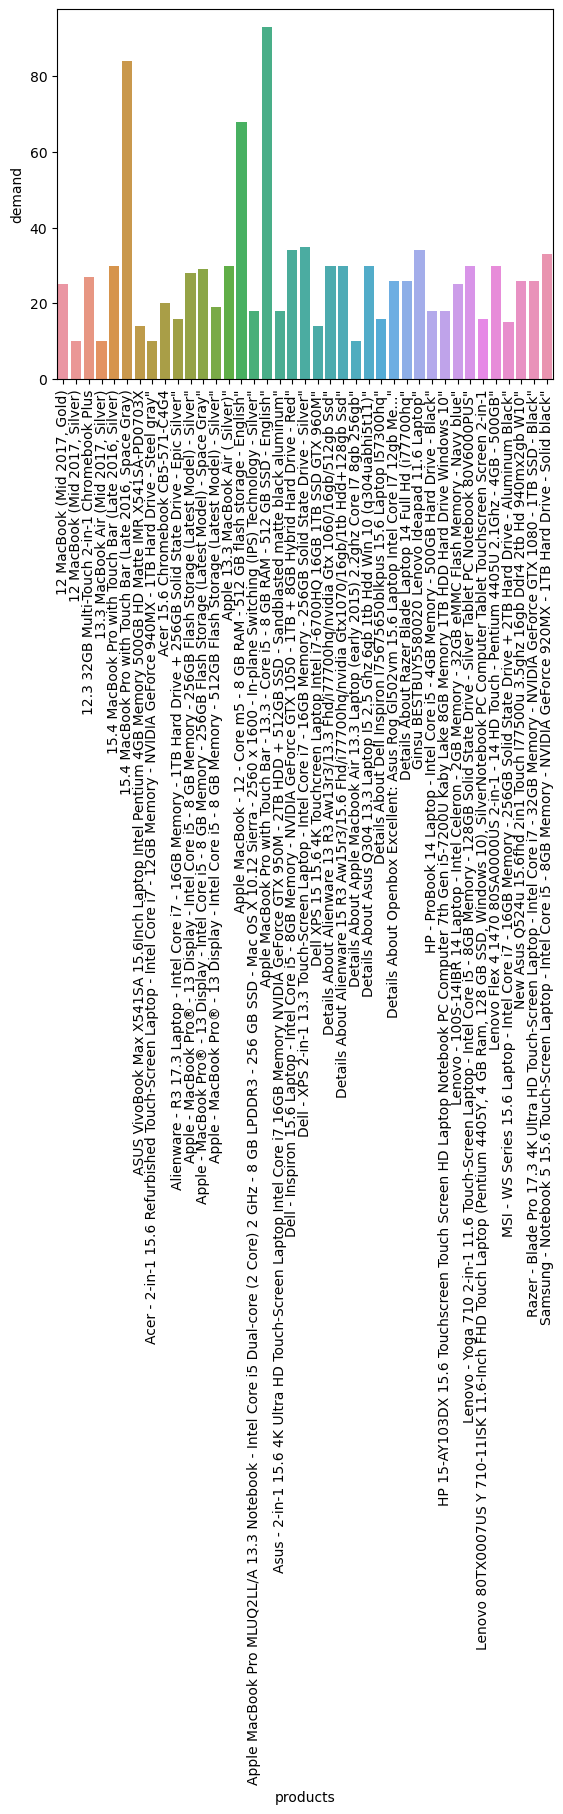

In [72]:
aux_demand = pd.DataFrame(y_demand.apply(lambda x: x.sum())).reset_index()
aux_demand.columns = ['products', 'demand']
aux_demand.head()
plt.xticks(rotation=90)
sns.barplot(x='products', y='demand', data=aux_demand);

## 5.3 graphic analysis

### 5.3.1 for X

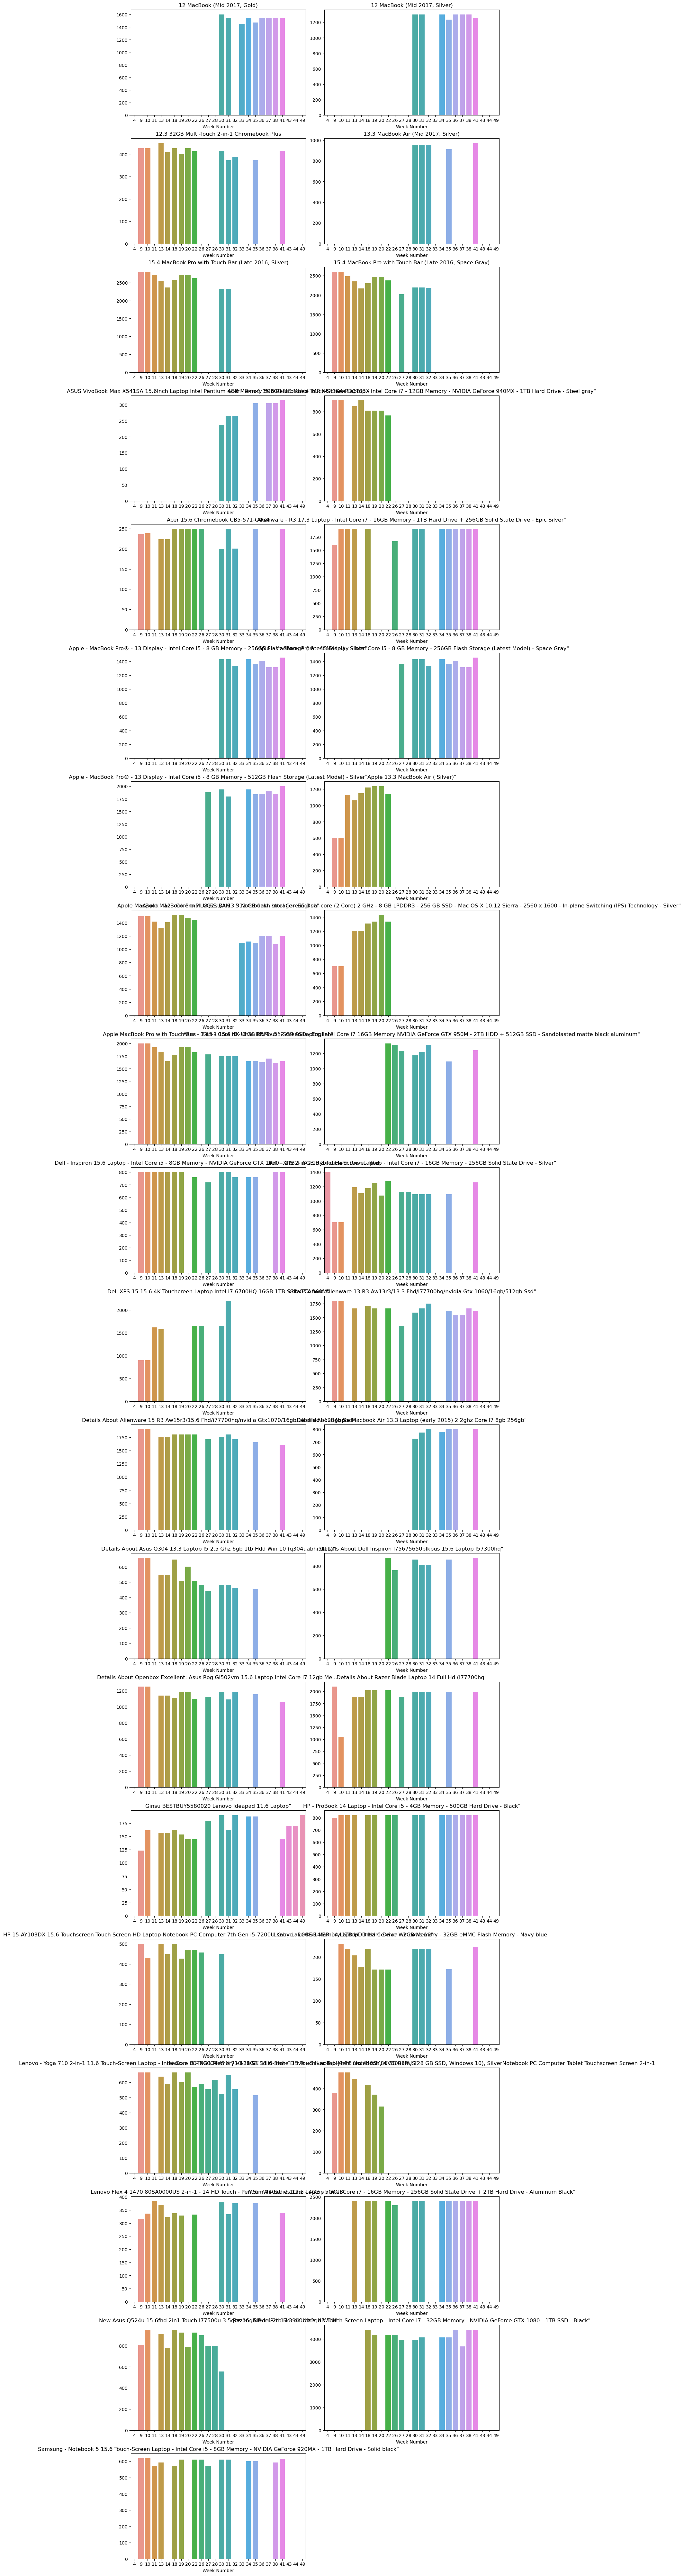

In [91]:
n_cols = 2 
n_rows = int(np.ceil(len(x_price_df.columns[1:]) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows), constrained_layout=True)

axes = axes.flatten()

for k, col_name in enumerate(x_price_df.columns[1:], start=0):
    sns.barplot(
        x=x_price_df['week_number'], 
        y=x_price_df[col_name], 
        ax=axes[k]
    )
    axes[k].set_title(col_name)
    axes[k].set_ylabel('')
    axes[k].set_xlabel('Week Number')

for k in range(len(x_price_df.columns[1:]), len(axes)):
    fig.delaxes(axes[k])

plt.show()

### 5.3.2 for Y

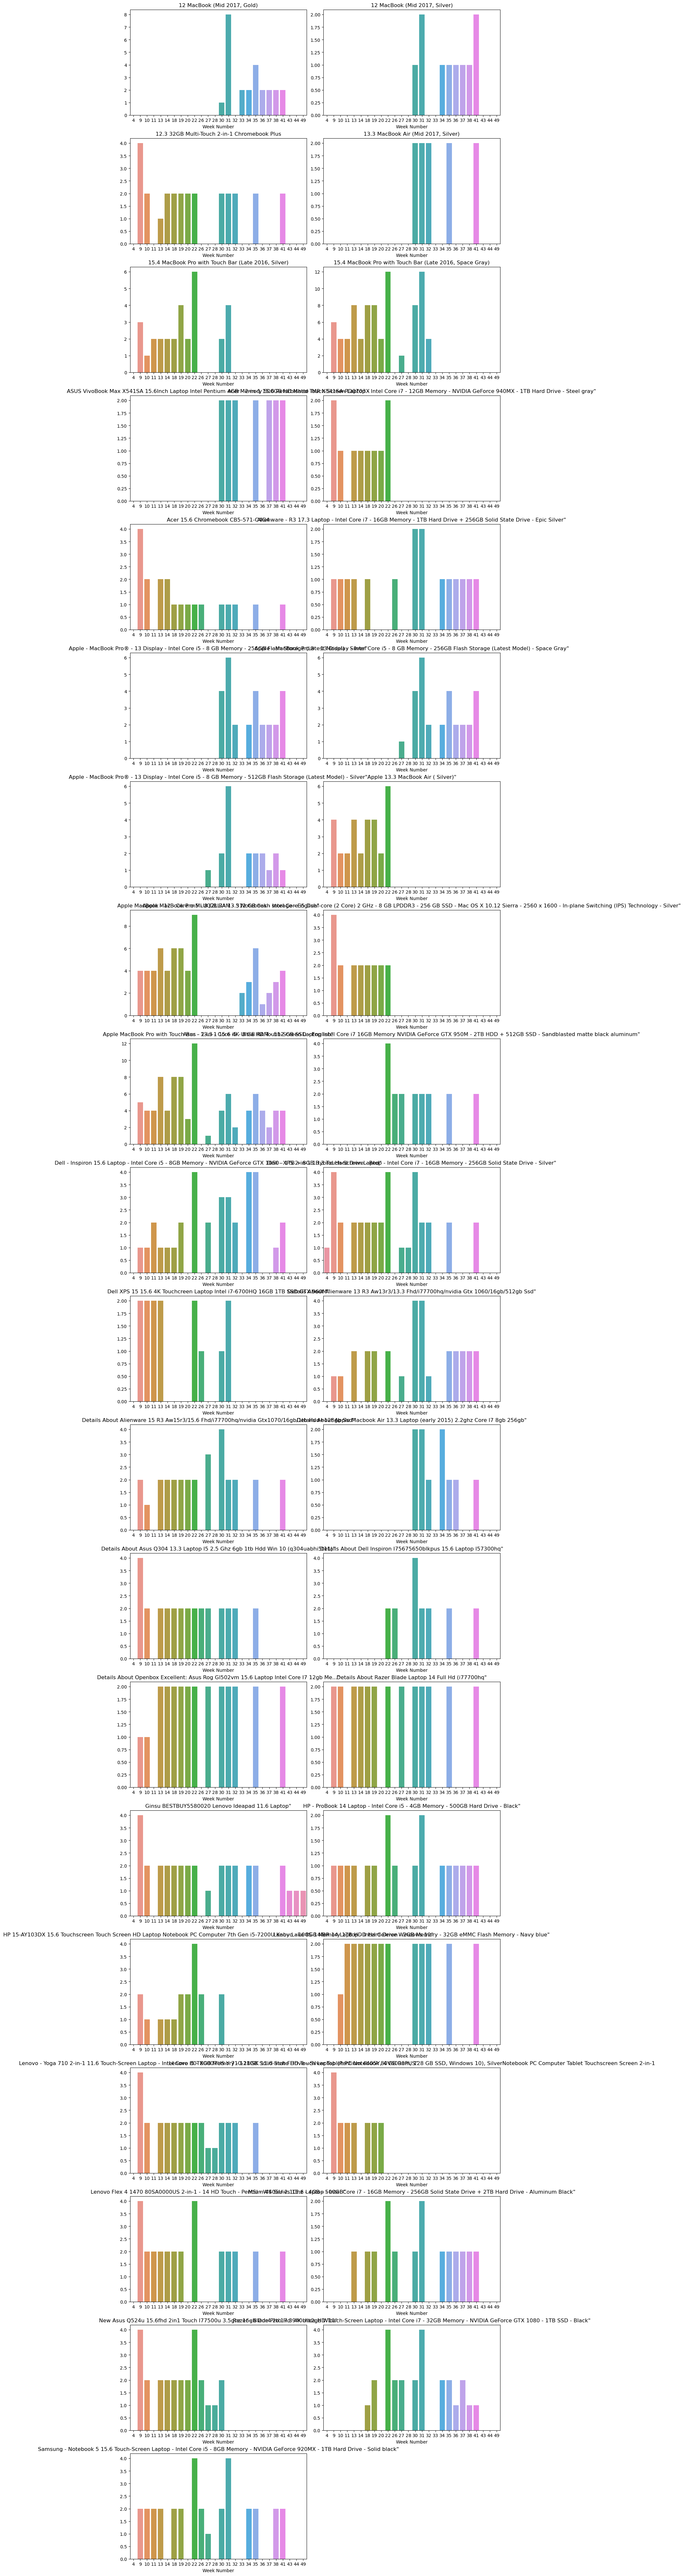

In [93]:
n_cols = 2 
n_rows = int(np.ceil(len(y_demand_df.columns[1:]) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows), constrained_layout=True)

axes = axes.flatten()

for k, col_name in enumerate(y_demand_df.columns[1:], start=0):
    sns.barplot(
        x=y_demand_df['week_number'], 
        y=y_demand_df[col_name], 
        ax=axes[k]
    )
    axes[k].set_title(col_name)
    axes[k].set_ylabel('')
    axes[k].set_xlabel('Week Number')

for k in range(len(y_demand_df.columns[1:]), len(axes)):
    fig.delaxes(axes[k])

plt.show()

# 6.0 machine learning modeling

In [129]:
x_price = x_price.reset_index(drop=True)
y_demand = y_demand.reset_index(drop=True)

results_values_laptop = {
    'name': [],
    'price_elasticity': [],
    'price_mean': [],
    'quantity_mean': [],
    'intercept': [],
    'slope': [],
    'rsquared': [],
    'p_value': []
}

for column in x_price.columns[1:]:

    column_points = list(zip(x_price[column].values, y_demand[column].values))
        
    df = pd.DataFrame(column_points, columns=['x_price', 'y_demand'])
        
    x_laptop = df['x_price']
    y_laptop = df['y_demand']
    X_laptop = sm.add_constant(x_laptop)
        
    model = sm.OLS(y_laptop, X_laptop)
    results = model.fit()
        
    if results.f_pvalue < 0.05:
        
        rsquared = results.rsquared
        p_value = results.f_pvalue
        intercept, slope = results.params
        mean_price = np.mean(x_laptop)
        mean_quantity = np.mean(y_laptop)
        
        price_elasticity = slope*(mean_price/mean_quantity)
        results_values_laptop['name'].append(column)
        results_values_laptop['price_elasticity'].append(price_elasticity)
        results_values_laptop['price_mean'].append(mean_price)
        results_values_laptop['quantity_mean'].append(mean_quantity)
        results_values_laptop['intercept'].append(intercept)
        results_values_laptop['slope'].append(slope)
        results_values_laptop['rsquared'].append(rsquared)
        results_values_laptop['p_value'].append(p_value)
            
df_elasticity = pd.DataFrame(results_values_laptop)
df_elasticity

name  price_elasticity  \
0                      12 MacBook (Mid 2017, Silver)        -65.115595   
1  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...        -16.039643   
2                  Acer 15.6 Chromebook CB5-571-C4G4         -8.432545   
3  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...         -6.018642   
4  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...        -23.203537   
5  Details About Apple Macbook Air 13.3 Laptop (e...        -68.165723   
6  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...         -6.049399   

    price_mean  quantity_mean  intercept     slope  rsquared   p_value  
0  1295.990000       0.384615  25.429075 -0.019325  0.196027  0.023508  
1   299.720769       0.538462   9.175192 -0.028816  0.281984  0.005251  
2   242.479231       0.769231   7.255804 -0.026751  0.161645  0.041743  
3  1224.221154       0.692308   4.859060 -0.003404  0.236464  0.011774  
4   790.759231       1.307692  31.650779 -0.038372  0.327839  0.002237  
5   795.509231       0.384615  26.602201 -0.032957  0.510312  0.000041  
6   209.663077       0.961538   6.778268 -0.027743  0.277667  0.005677

# 7.0 price elasticity

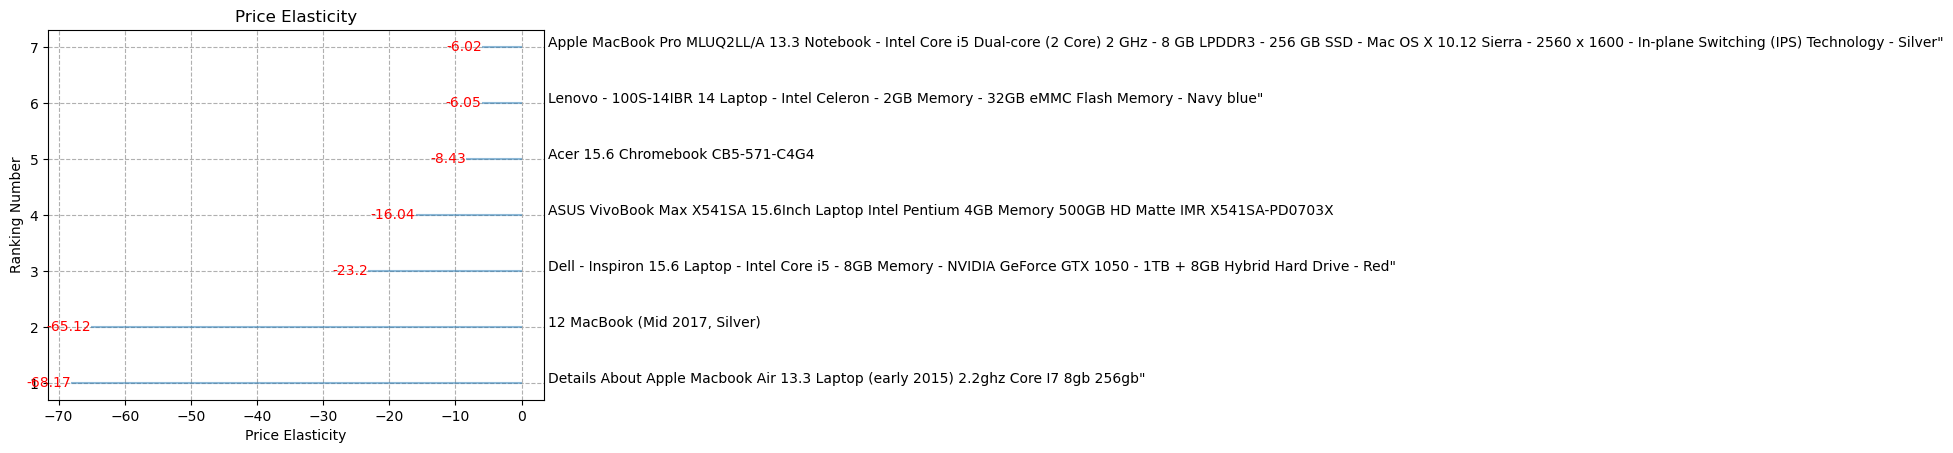

In [131]:
df_elasticity['ranking'] = df_elasticity.loc[:, 'price_elasticity'].rank(ascending=True).astype(int)
df_elasticity = df_elasticity.reset_index(drop=True)
plt.hlines(y=df_elasticity['ranking'], xmin=0, xmax=df_elasticity['price_elasticity'], alpha=0.5)

for name, p in zip(df_elasticity['name'], df_elasticity['ranking']):
    plt.text(4, p, name)
    
for x, y, s in zip(df_elasticity['price_elasticity'], df_elasticity['ranking'], df_elasticity['price_elasticity']):
    plt.text(x, y, round(s, 2), horizontalalignment='right' if x < 0 else 'left',
            verticalalignment='center', fontdict={'color': 'red' if x < 0 else 'green', 'size': 10})
    
plt.gca().set(ylabel='Ranking Number', xlabel='Price Elasticity')
plt.title('Price Elasticity')
plt.grid(linestyle='--')

In [132]:
df_ranking = df_elasticity[['ranking', 'name', 'price_elasticity']].sort_values(by='price_elasticity', ascending=False)
df_ranking

ranking                                               name  \
3        7  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   
6        6  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   
2        5                  Acer 15.6 Chromebook CB5-571-C4G4   
1        4  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   
4        3  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   
0        2                      12 MacBook (Mid 2017, Silver)   
5        1  Details About Apple Macbook Air 13.3 Laptop (e...   

   price_elasticity  
3         -6.018642  
6         -6.049399  
2         -8.432545  
1        -16.039643  
4        -23.203537  
0        -65.115595  
5        -68.165723

# 8.0 business performance

In [143]:
invoicing_results = {
    'name': [],
    'current_invoicing': [],
    'reduced_invoicing': [],
    'invoicing_loss': [],
    'new_invoicing': [],
    'invoicing_variation': [],
    'percentage_variation': []
}

for i in range(len(df_ranking)):
    
    current_average_price = x_price[df_ranking['name'][i]].mean()
    current_demand = y_demand[df_ranking['name'][i]].sum()
    
    reduced_price = current_average_price * 0.9
    demand_increase_factor = -0.1 * df_ranking['price_elasticity'][i]
    new_demand = demand_increase_factor * current_demand
    
    current_invoicing = round(current_average_price * current_demand, 2)
    new_invoicing = round(reduced_price * new_demand, 2)
    reduced_invoicing = round(current_invoicing * 0.9, 2)
    invoicing_loss = round(current_invoicing - reduced_invoicing, 2)
    invoicing_variation = round(new_invoicing - current_invoicing, 2)
    percentage_variation = round(((new_invoicing - current_invoicing) / current_invoicing) * 100, 2)
    
    invoicing_results['name'].append(df_ranking['name'][i])
    invoicing_results['current_invoicing'].append(current_invoicing)
    invoicing_results['reduced_invoicing'].append(reduced_invoicing)
    invoicing_results['invoicing_loss'].append(invoicing_loss)
    invoicing_results['new_invoicing'].append(new_invoicing)
    invoicing_results['invoicing_variation'].append(invoicing_variation)
    invoicing_results['percentage_variation'].append(percentage_variation)


invoicing_df = pd.DataFrame(invoicing_results)
invoicing_df  

name  current_invoicing  \
0                      12 MacBook (Mid 2017, Silver)           12959.90   
1  ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...            4196.09   
2                  Acer 15.6 Chromebook CB5-571-C4G4            4849.58   
3  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...           22035.98   
4  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...           26885.81   
5  Details About Apple Macbook Air 13.3 Laptop (e...            7955.09   
6  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...            5241.58   

   reduced_invoicing  invoicing_loss  new_invoicing  invoicing_variation  \
0           11663.91         1295.99       75950.24             62990.34   
1            3776.48          419.61        6057.34              1861.25   
2            4364.62          484.96        3680.49             -1169.09   
3           19832.38         2203.60       11936.40            -10099.58   
4           24197.23         2688.58       56146.14             29260.33   
5            7159.58          795.51       48803.82             40848.73   
6            4717.42          524.16        2853.75             -2387.83   

   percentage_variation  
0                486.04  
1                 44.36  
2                -24.11  
3                -45.83  
4                108.83  
5                513.49  
6                -45.56

# 9.0 cross price elasticity

In [154]:
def cross_price_elasticity(df_x, df_y, column_name):

    # copy the price DataFrame and add the corresponding demand for the target product
    new_df = df_x.copy()
    new_df['y_value_' + column_name] = df_y[column_name]

    # separate independent variables (prices of other products) and dependent variable (demand for the target product)
    multi_xvalues = new_df.loc[:, new_df.columns[1:-1]]  # prices of other products
    multi_yvalues = new_df['y_value_' + column_name]     # demand for the target product

    # calculate the average prices and demand
    mean_xvalues = np.mean(multi_xvalues)  # average price of other products
    mean_yvalues = np.mean(multi_yvalues)  # average demand for the target product

    # perform linear regression (Y = target product demand, X = prices of other products)
    X = sm.add_constant(multi_xvalues)  # add a constant term (intercept) to the model
    model = sm.OLS(multi_yvalues, X, missing='drop')  # fit the Ordinary Least Squares (OLS) regression model
    result = model.fit()

    # extract regression summary and p-values for coefficients
    results_summary = result.summary()
    pvalues = result.pvalues  # extract p-values for each coefficient

    # convert regression coefficients into a DataFrame
    results_as_html = results_summary.tables[1].as_html()
    coefficients_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

    # add p-values to the DataFrame
    coefficients_df['p_value'] = pvalues

    # calculate cross-price elasticity
    coefficients_df['mean_price'] = mean_xvalues  # average price for products
    coefficients_df['price_elasticity'] = round(
        coefficients_df['coef'] * (coefficients_df['mean_price'] / mean_yvalues), 2
    )

    # format the DataFrame for clarity
    coefficients_df.index.name = 'name'  # set the index name to "name"
    coefficients_df = coefficients_df.reset_index()  # reset the index for a cleaner format

    # determine statistical significance
    coefficients_df[column_name + '_CPE'] = np.where(
        coefficients_df['p_value'] > 0.05, 'No Effect', coefficients_df['price_elasticity']
    )

    # remove NaN values and return only relevant columns
    coefficients_df = coefficients_df.dropna()
    return coefficients_df[['name', column_name + '_CPE']]


In [152]:
#example for 12 MacBook (Mid 2017, Silver)
elasticity_df1 = cross_price_elasticity(x_price, y_demand, '12 MacBook (Mid 2017, Silver)')
elasticity_df1

name  \
0                                               const   
1                       12 MacBook (Mid 2017, Silver)   
2        12.3 32GB Multi-Touch 2-in-1 Chromebook Plus   
3                 13.3 MacBook Air (Mid 2017, Silver)   
4   15.4 MacBook Pro with Touch Bar (Late 2016, Si...   
5   15.4 MacBook Pro with Touch Bar (Late 2016, Sp...   
6   ASUS VivoBook Max X541SA 15.6Inch Laptop Intel...   
7   Acer - 2-in-1 15.6 Refurbished Touch-Screen La...   
8                   Acer 15.6 Chromebook CB5-571-C4G4   
9   Alienware - R3 17.3 Laptop - Intel Core i7 - 1...   
10  Apple - MacBook Pro® - 13 Display - Intel Core...   
11  Apple - MacBook Pro® - 13 Display - Intel Core...   
12  Apple - MacBook Pro® - 13 Display - Intel Core...   
13                  Apple 13.3 MacBook Air ( Silver)"   
14  Apple MacBook - 12 - Core m5 - 8 GB RAM - 512 ...   
15  Apple MacBook Pro MLUQ2LL/A 13.3 Notebook - In...   
16  Apple MacBook Pro with Touch Bar - 13.3 - Core...   
17  Asus - 2-in-1 15.6 4K Ultra HD Touch-Screen La...   
18  Dell - Inspiron 15.6 Laptop - Intel Core i5 - ...   
19  Dell - XPS 2-in-1 13.3 Touch-Screen Laptop - I...   
20  Dell XPS 15 15.6 4K Touchcreen Laptop Intel i7...   
21  Details About Alienware 13 R3 Aw13r3/13.3 Fhd/...   
22  Details About Alienware 15 R3 Aw15r3/15.6 Fhd/...   
23  Details About Apple Macbook Air 13.3 Laptop (e...   
24  Details About Asus Q304 13.3 Laptop I5 2.5 Ghz...   
25  Details About Dell Inspiron I75675650blkpus 15...   
26  Details About Openbox Excellent: Asus Rog Gl50...   
27  Details About Razer Blade Laptop 14 Full Hd (i...   
28   Ginsu BESTBUY5580020 Lenovo Ideapad 11.6 Laptop"   
29  HP - ProBook 14 Laptop - Intel Core i5 - 4GB M...   
30  HP 15-AY103DX 15.6 Touchscreen Touch Screen HD...   
31  Lenovo - 100S-14IBR 14 Laptop - Intel Celeron ...   
32  Lenovo - Yoga 710 2-in-1 11.6 Touch-Screen Lap...   
33  Lenovo 80TX0007US Y 710-11ISK 11.6-Inch FHD To...   
34  Lenovo Flex 4 1470 80SA0000US 2-in-1 - 14 HD T...   
35  MSI - WS Series 15.6 Laptop - Intel Core i7 - ...   
36  New Asus Q524u 15.6fhd 2in1 Touch I77500u 3.5g...   
37  Razer - Blade Pro 17.3 4K Ultra HD Touch-Scree...   
38  Samsung - Notebook 5 15.6 Touch-Screen Laptop ...   

   12 MacBook (Mid 2017, Silver)_CPE  
0                                0.0  
1                               -5.6  
2                              -17.1  
3                                5.6  
4                              -1.87  
5                              14.62  
6                             -18.04  
7                             -13.06  
8                              -7.46  
9                              -4.04  
10                            -26.12  
11                              8.08  
12                             30.79  
13                             -6.84  
14                         No Effect  
15                            -14.93  
16                             -9.02  
17                              1.24  
18                            -15.86  
19                         No Effect  
20                             18.04  
21                            -17.72  
22                             -7.15  
23                            -15.24  
24                             17.41  
25                             -4.66  
26                               8.4  
27                             -1.24  
28                         No Effect  
29                               2.8  
30                             -7.77  
31                            -11.19  
32                              3.73  
33                             -9.95  
34                              7.15  
35                             13.06  
36                              0.93  
37                              3.73  
38                             -7.77